# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

>#### $$ \nabla{Q(w)} = \frac{2}{l}X^T(Xw - y ) $$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [12]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [13]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:

    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'


In [14]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)


regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: 96452822


* **StochasticDescent**: 96452835


* **MomentumDescent**: 96452842


* **Adam**: 96452857


* **LinearRegression**: 96453052

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent, LossFunction
from linear_regression import LinearRegression

import warnings
warnings.filterwarnings("ignore")


sns.set(style='darkgrid')

In [16]:
data = pd.read_csv('autos.csv')

In [17]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [18]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

## 1. Анализ целевой переменной

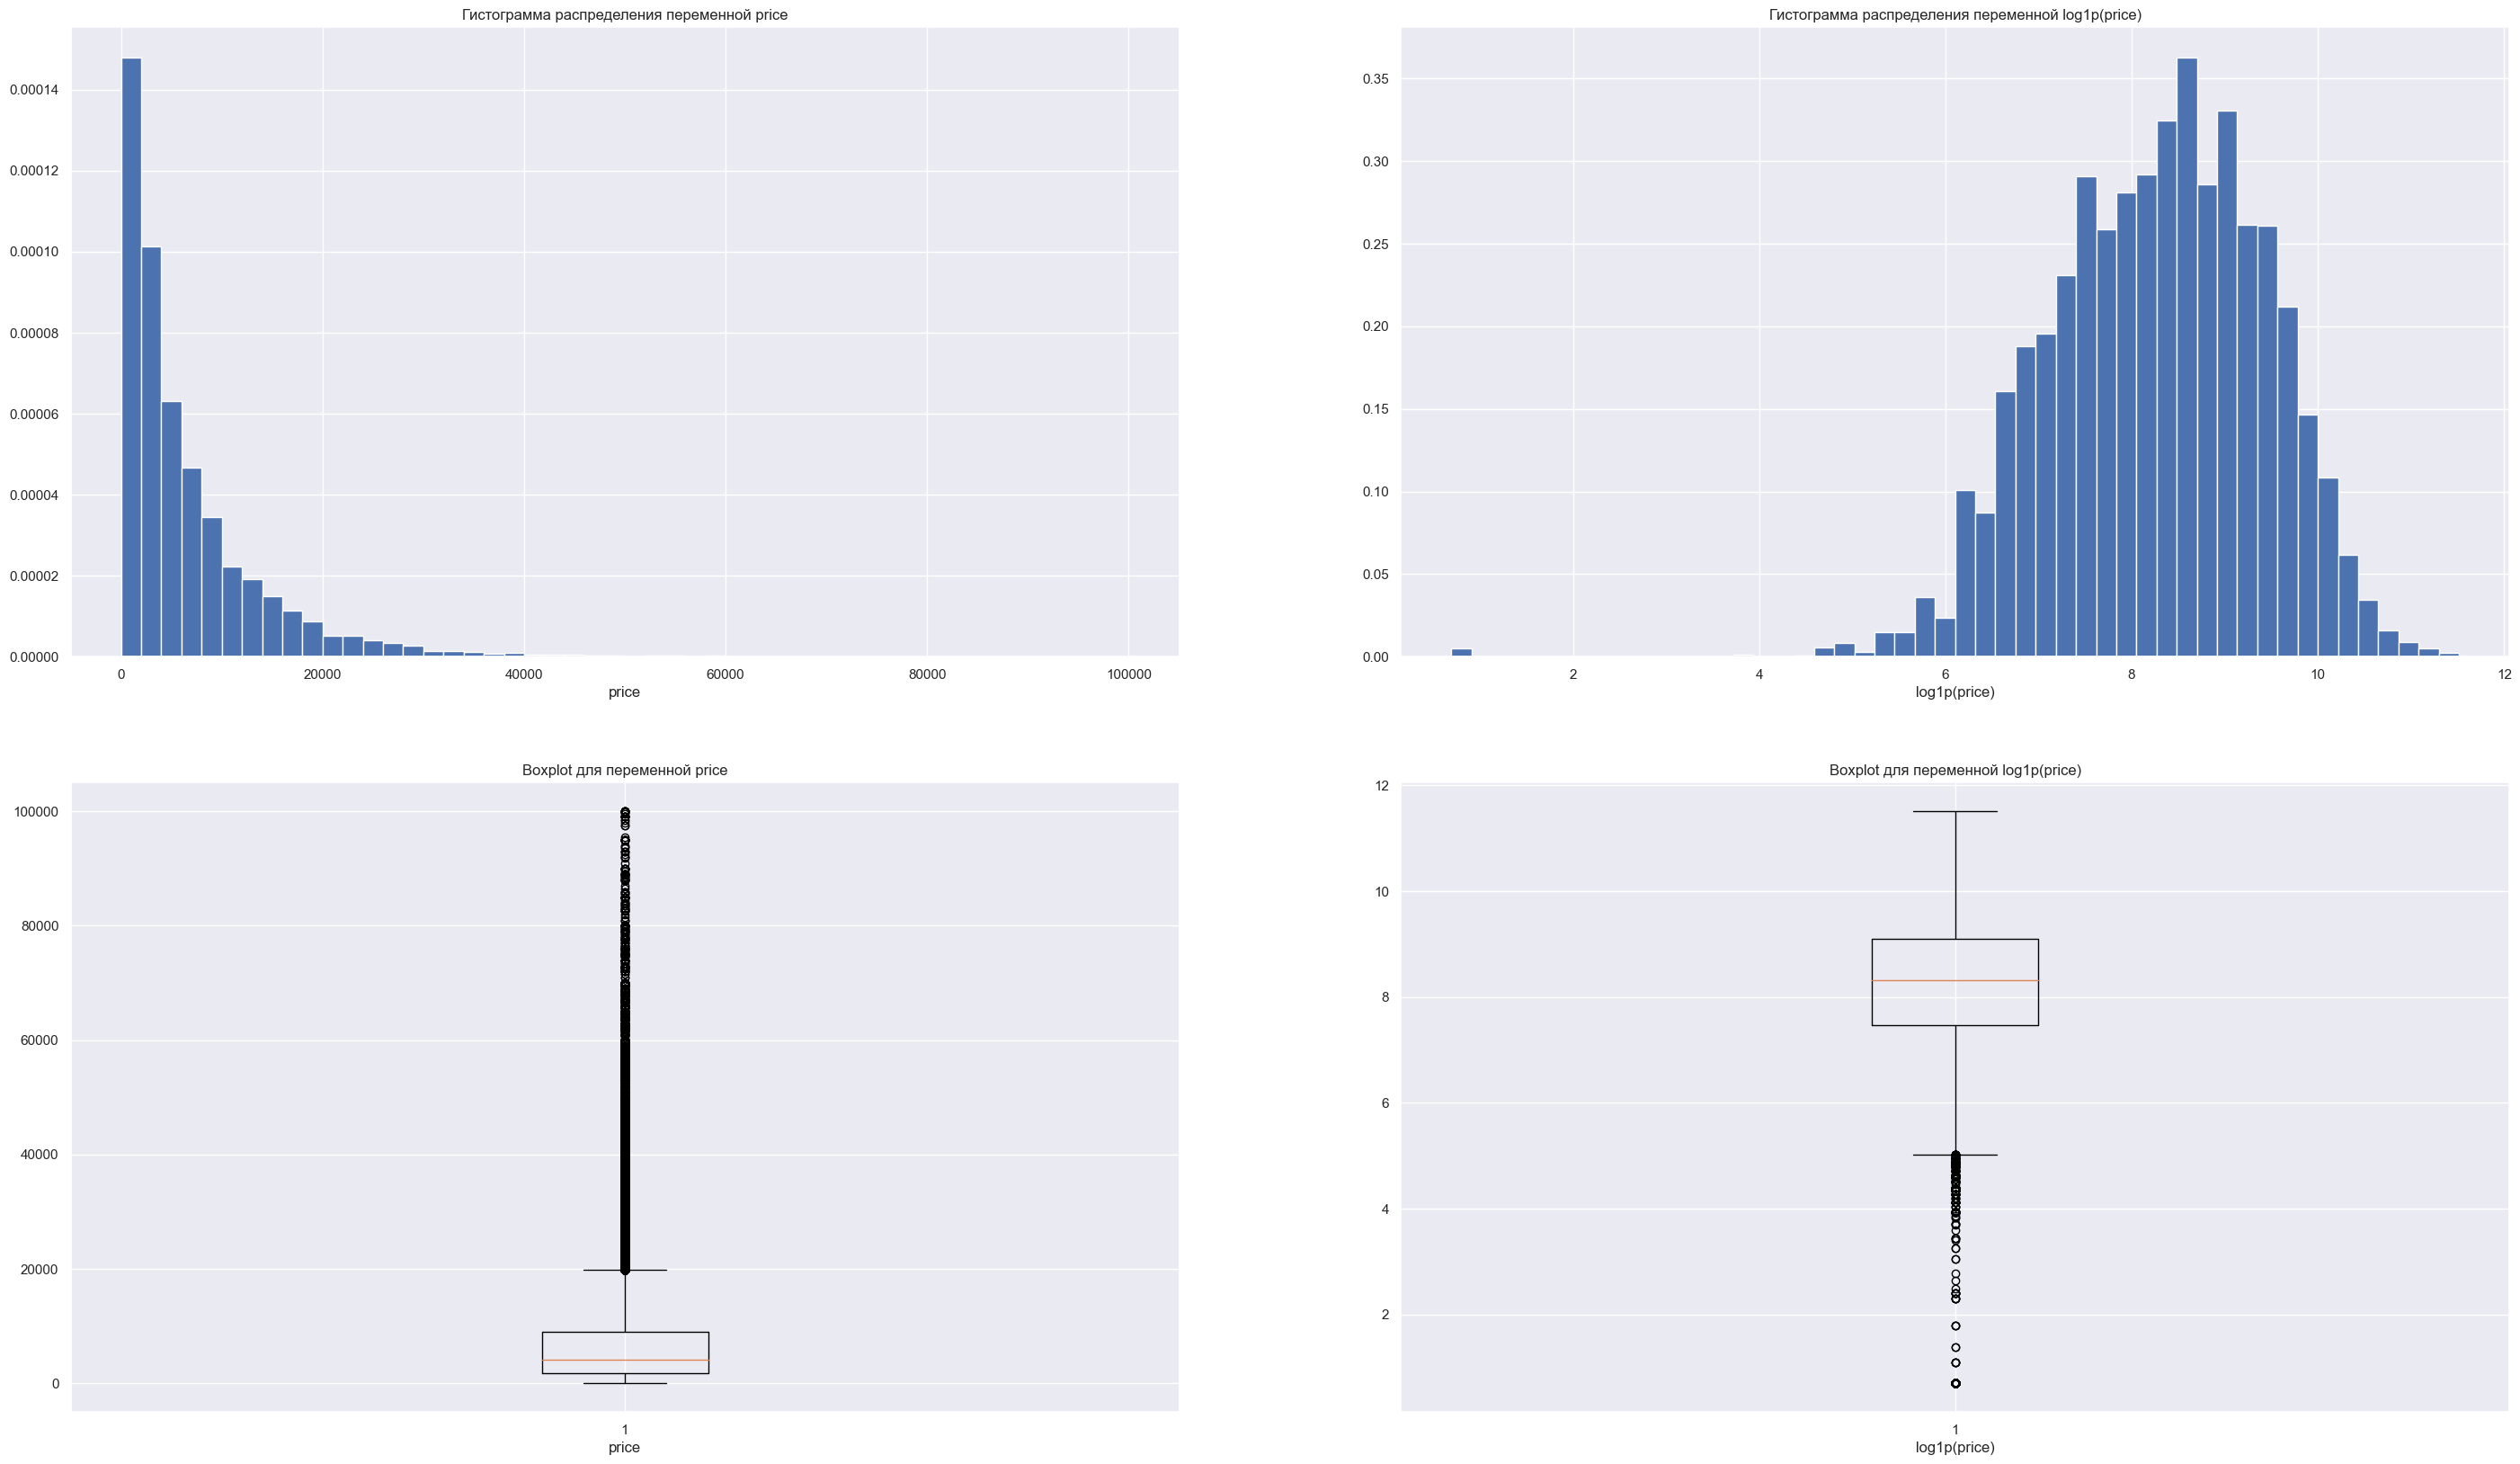

In [19]:
figure, ax = plt.subplots(2, 2, figsize=(35,20))

ax[0][0].hist(data.price, bins=50, density=True)
ax[0][0].set_title('Гистограмма распределения переменной price')
ax[0][0].set_xlabel('price')

ax[0][1].hist(np.log1p(data.price), bins=50, density=True)
ax[0][1].set_title('Гистограмма распределения переменной log1p(price)')
ax[0][1].set_xlabel('log1p(price)')

ax[1][0].boxplot(data.price)
ax[1][0].set_title('Boxplot для переменной price')
ax[1][0].set_xlabel('price')

ax[1][1].boxplot(np.log1p(data.price))
ax[1][1].set_title('Boxplot для переменной log1p(price)')
ax[1][1].set_xlabel('log1p(price)');


#### _**Вывод:**_ Из графиков видно, что в переменной price достаточно большое количество. После применения <code>np.log1p</code> на графике boxplot для log1p(price) количество выбросов значительно уменьшилось, поэтому заменим целевую переменную на ее log1p

In [20]:
data.price = np.log1p(data.price)

#### Очистим датафрейм от выбросов

In [21]:
data = data[(data.price >= data.price.quantile(0.25))]

## 2. Анализ признаков 

- ### Анализ типов столбцов

In [22]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                float64
dtype: object

- ### Графики зависимости целевой переменной от признака, распределения значений признака, boxplot'ы

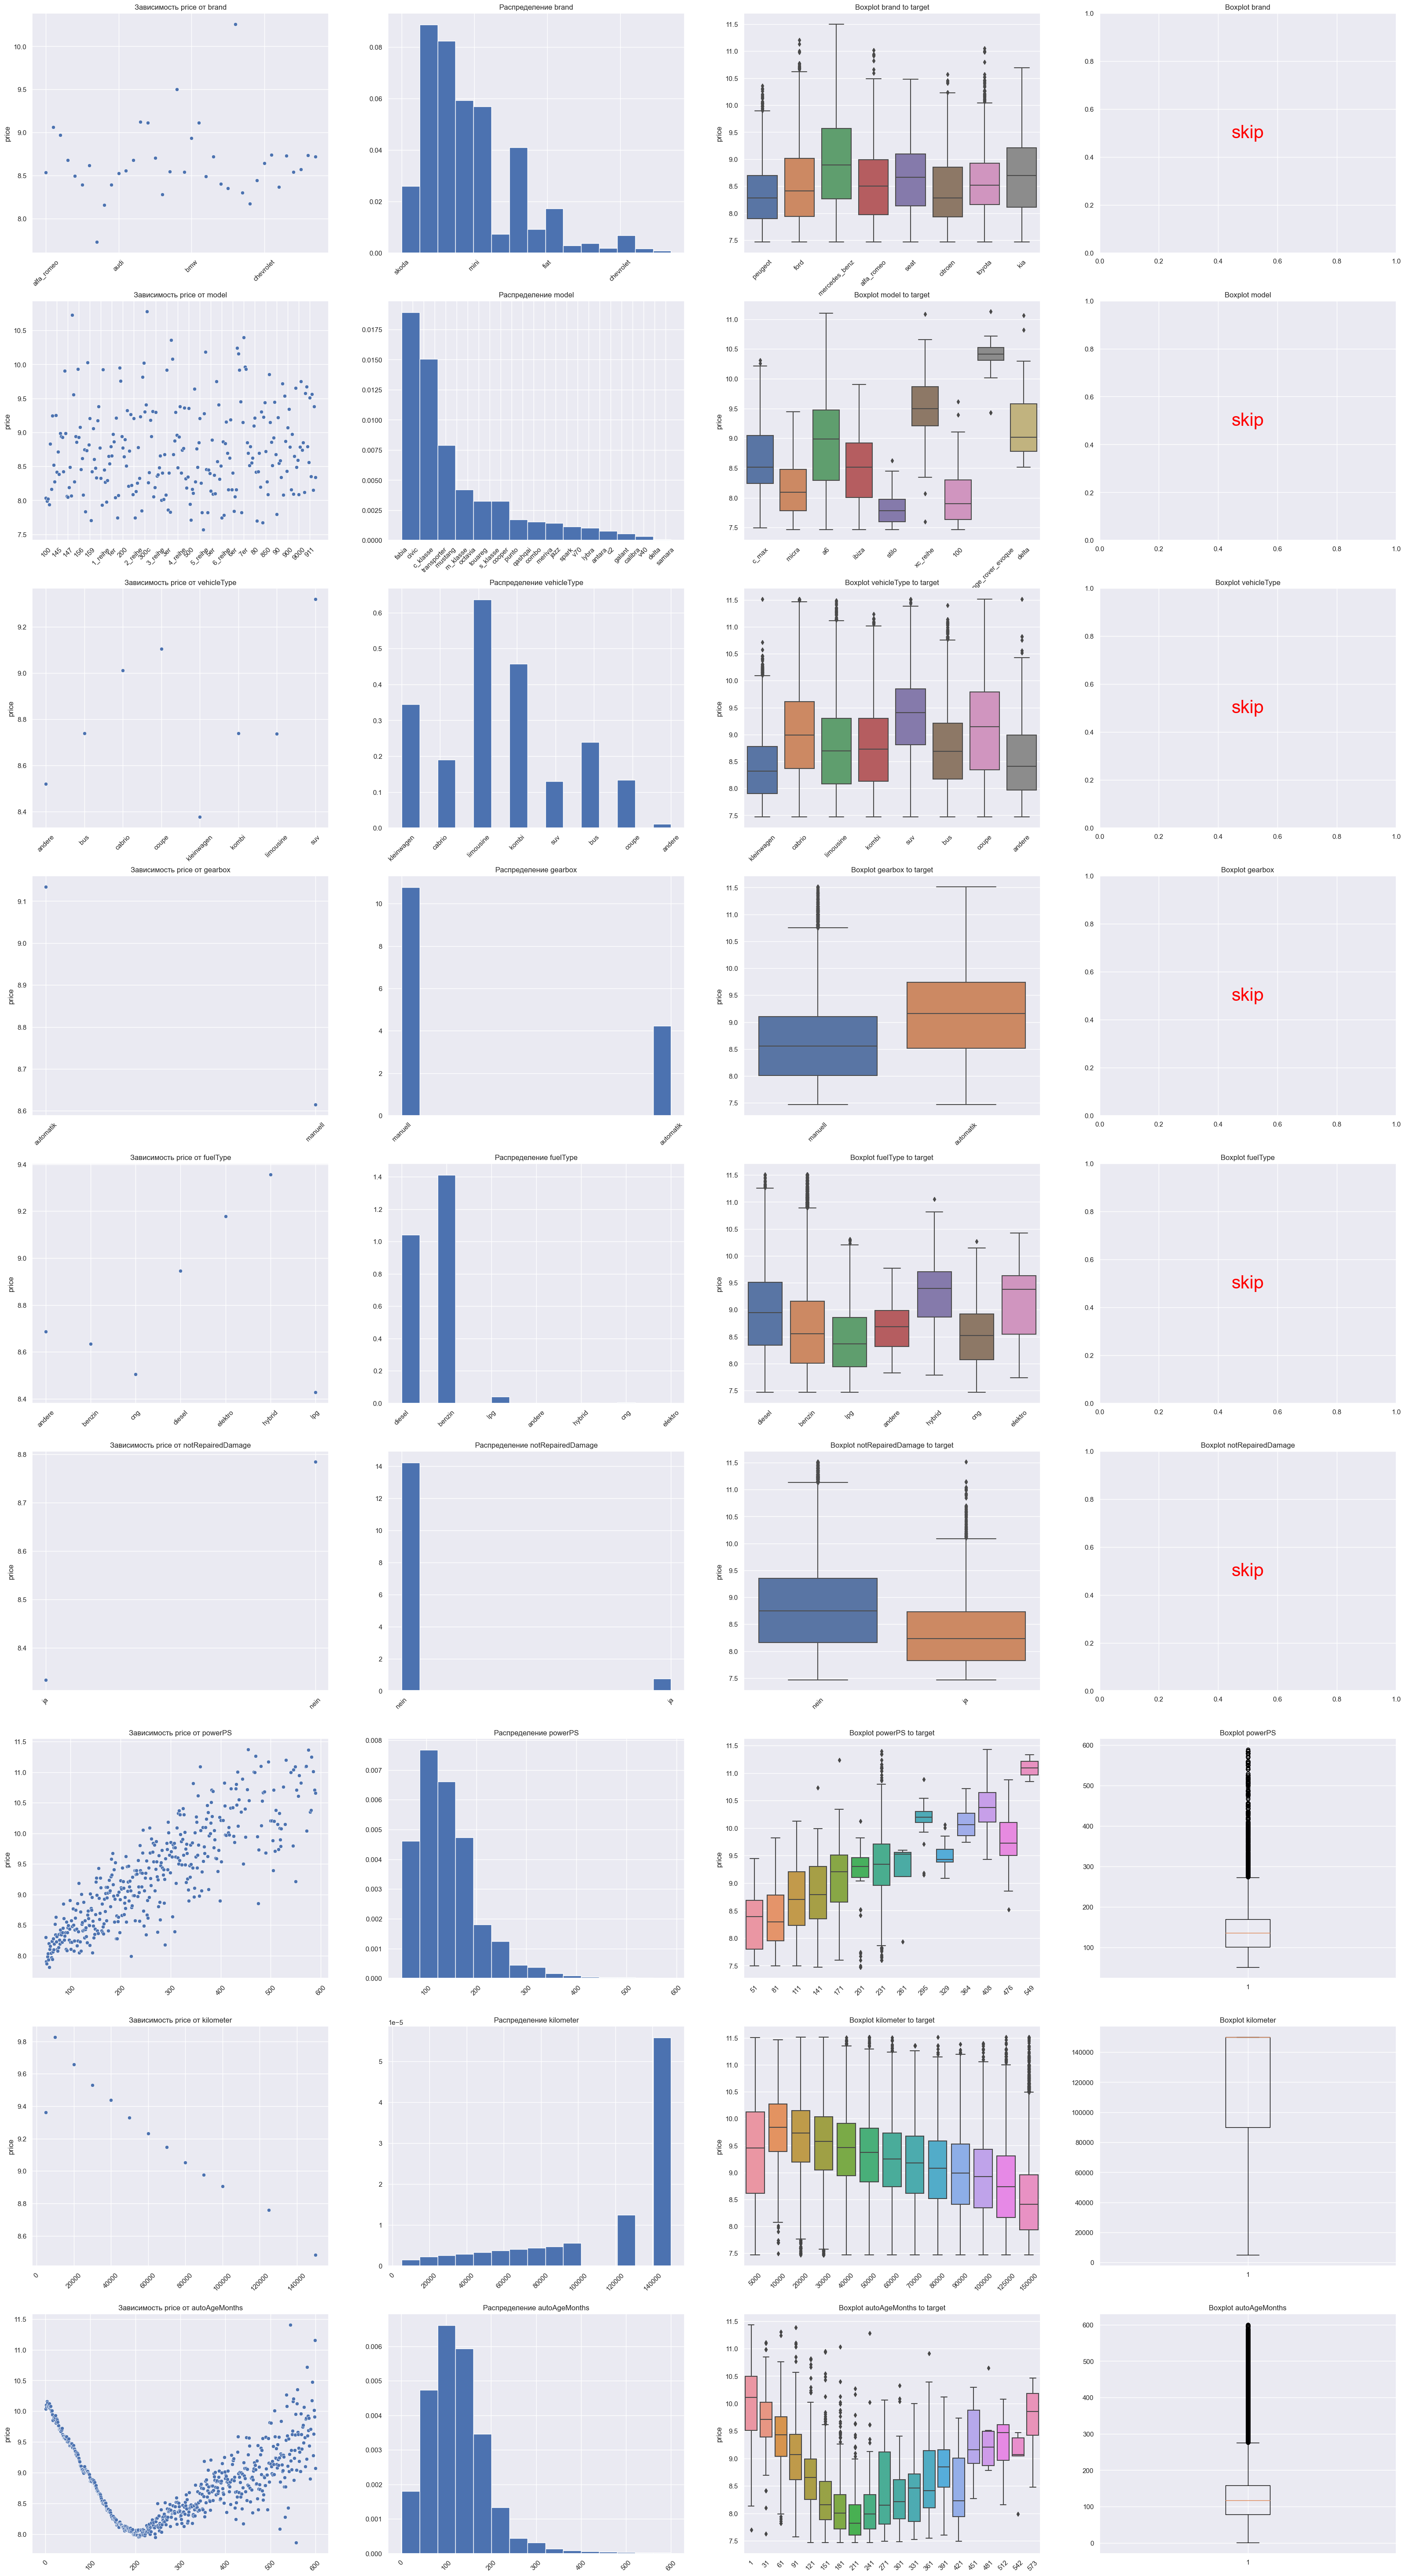

In [23]:
figure, ax = plt.subplots(9, 4, figsize=(40,75))


### Цикл был использован для упрощения построения графиков ###
for i in range(9):
    
    df = data.groupby(data.columns[i]).agg({'price':'mean'}).reset_index()

    sns.scatterplot(data=df, x=data.columns[i], y='price', ax=ax[i][0])
    ax[i][0].set_xticklabels(ax[i][0].get_xticklabels(), rotation=45)
    if (data.columns[i] == 'brand') | (data.columns[i] == 'model'):
        ax[i][0].set_xticks(ax[i][0].get_xticks()[::10])

    ax[i][0].set_title(f'Зависимость price от {data.columns[i]}')
    ax[i][0].set_xlabel('')
    

    ax[i][1].hist(data[data.columns[i]].values, bins=15, density=True)
    if (data.columns[i] == 'brand') | (data.columns[i] == 'model'):
        ax[i][1].set_xticks(ax[i][1].get_xticks()[::10])

    ax[i][1].set_xticklabels(ax[i][1].get_xticklabels(), rotation=45)
    ax[i][1].set_title(f'Распределение {data.columns[i]}')
    ax[i][1].set_xlabel('')

    
    if (data.columns[i] == 'brand'):
        labels = np.unique(data[data.columns[i]])[::5]
        df = data[data[data.columns[i]].isin(labels)]
        sns.boxplot(data=df, x=df[data.columns[i]], y='price', ax=ax[i][2])

    elif (data.columns[i] == 'model') | (data.columns[i] == 'powerPS') | (data.columns[i] == 'autoAgeMonths'):
        labels = np.unique(data[data.columns[i]])[::30]
        df = data[data[data.columns[i]].isin(labels)]
        sns.boxplot(data=df, x=df[data.columns[i]], y='price', ax=ax[i][2])

    else:

        sns.boxplot(data=data, x=data[data.columns[i]], y='price', ax=ax[i][2])

    ax[i][2].set_xticklabels(ax[i][2].get_xticklabels(), rotation=45)
    ax[i][2].set_title(f'Boxplot {data.columns[i]} to target')
    ax[i][2].set_xlabel('')

    if data[data.columns[i]].dtype == 'object':
        ax[i][3].text(0.5, 0.5, 'skip', ha='center', va='center', fontsize=30, color='red')
    else:
        ax[i][3].boxplot(data[data.columns[i]])

    ax[i][3].set_title(f'Boxplot {data.columns[i]}')
    ax[i][3].set_xlabel('')



plt.show()

#### _**Вывод**_: На основе графиков можно сделать предположение, что все признаки могут быть потенциально полезными, поскольку большинство значений каждого признака имеют значительную дисперсию

#### Очистим данные от выбросов

In [24]:
data = data[
            
            (data['powerPS'].quantile(0.75) >= data['powerPS']) & 
            (data['autoAgeMonths'].quantile(0.75) >= data['autoAgeMonths']) 

            ]

- #### Трансформации признаков

  - #### Переделаем колонку <code>notRepairedDamage</code> в бинарный признак, поскольку нам нужно исключить возможность дополнительного влияния этого признака на константу

  - #### По аналогичной причине переделаем колонку <code> gearbox </code> в бинарный признак

In [25]:
data.notRepairedDamage = data.notRepairedDamage.map({'ja': 1, 'nein': 0})
data.gearbox = data.gearbox.map({'manuell': 1, 'automatik': 0})


In [26]:
other += ['notRepairedDamage', 'gearbox']
categorical.remove('notRepairedDamage')
categorical.remove('gearbox')

In [27]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [29]:
np.random.seed(15)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2)

X_test, X_val = train_test_split(X_test, test_size=0.5)

y_train = X_train['price']
y_test = X_test['price']
y_val = X_val['price']

X_train = X_train.drop('price', axis=1)
X_test = X_test.drop('price', axis=1)
X_val = X_val.drop('price', axis=1)

In [31]:
trainn = column_transformer.fit_transform(X_train)
vall = column_transformer.transform(X_val)
testt = column_transformer.transform(X_test)

feats = column_transformer.get_feature_names_out()


X_train_trns = pd.DataFrame(trainn.toarray(), columns=feats)
X_val_trns = pd.DataFrame(vall.toarray(), columns=feats) 
X_test_trns = pd.DataFrame(testt.toarray(), columns=feats) 


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [32]:
from sklearn.metrics import r2_score

trainn = column_transformer.fit_transform(X_train)
vall = column_transformer.transform(X_val)
testt = column_transformer.transform(X_test)

feats = column_transformer.get_feature_names_out()


X_train_trns = pd.DataFrame(trainn.toarray(), columns=feats)
X_val_trns = pd.DataFrame(vall.toarray(), columns=feats) 
X_test_trns = pd.DataFrame(testt.toarray(), columns=feats) 

lambdas = np.logspace(-6, 1, 20)


best_lambda = []

for model in ['full', 'stochastic', 'momentum', 'adam']:

    opt_lambda = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:

        descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': lambd
                }
            }

        regression = LinearRegression(descent_config=descent_config)

        regression.fit(X_train_trns.values, y_train.values)
        y_pred = regression.predict(X_val_trns.values)

        loss = regression.calc_loss(X_val_trns.values, y_val.values)

        if loss < loss_best:

            opt_lambda = lambd
            loss_best = loss

    best_lambda.append(opt_lambda)

    descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': opt_lambda,
                }
            }

    regression = LinearRegression(descent_config=descent_config)

    regression.fit(X_train_trns.values, y_train.values)
    

    scnd_clmn = regression.calc_loss(X_train_trns.values, y_train.values)
    thrd_clmn = regression.calc_loss(X_test_trns.values, y_test.values)
    frth_clmn = r2_score(y_train.values, regression.predict(X_train_trns.values))
    fifth_clmn = r2_score(y_test.values, regression.predict(X_test_trns.values))
    it = regression.iterat


    new_data = pd.DataFrame([[opt_lambda, scnd_clmn, thrd_clmn, frth_clmn, fifth_clmn,it]], columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)




full


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  1.832981   0.114888  0.118122   0.720747  0.715519        69

stochastic


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  0.78476   0.157351  0.164333   0.617534  0.604228       256

momentum


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  0.78476   0.071979  0.074324   0.825043  0.821001       106

adam


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332     0.0592  0.061707   0.856105  0.851387       139

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [33]:
data_for_graphs = dict()
models = ['full', 'stochastic', 'momentum', 'adam']
    
for i in range(4):
    descent_config = {
                    'descent_name': models[i],
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'lambda_': best_lambda[i]
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_graphs[models[i]] = losses


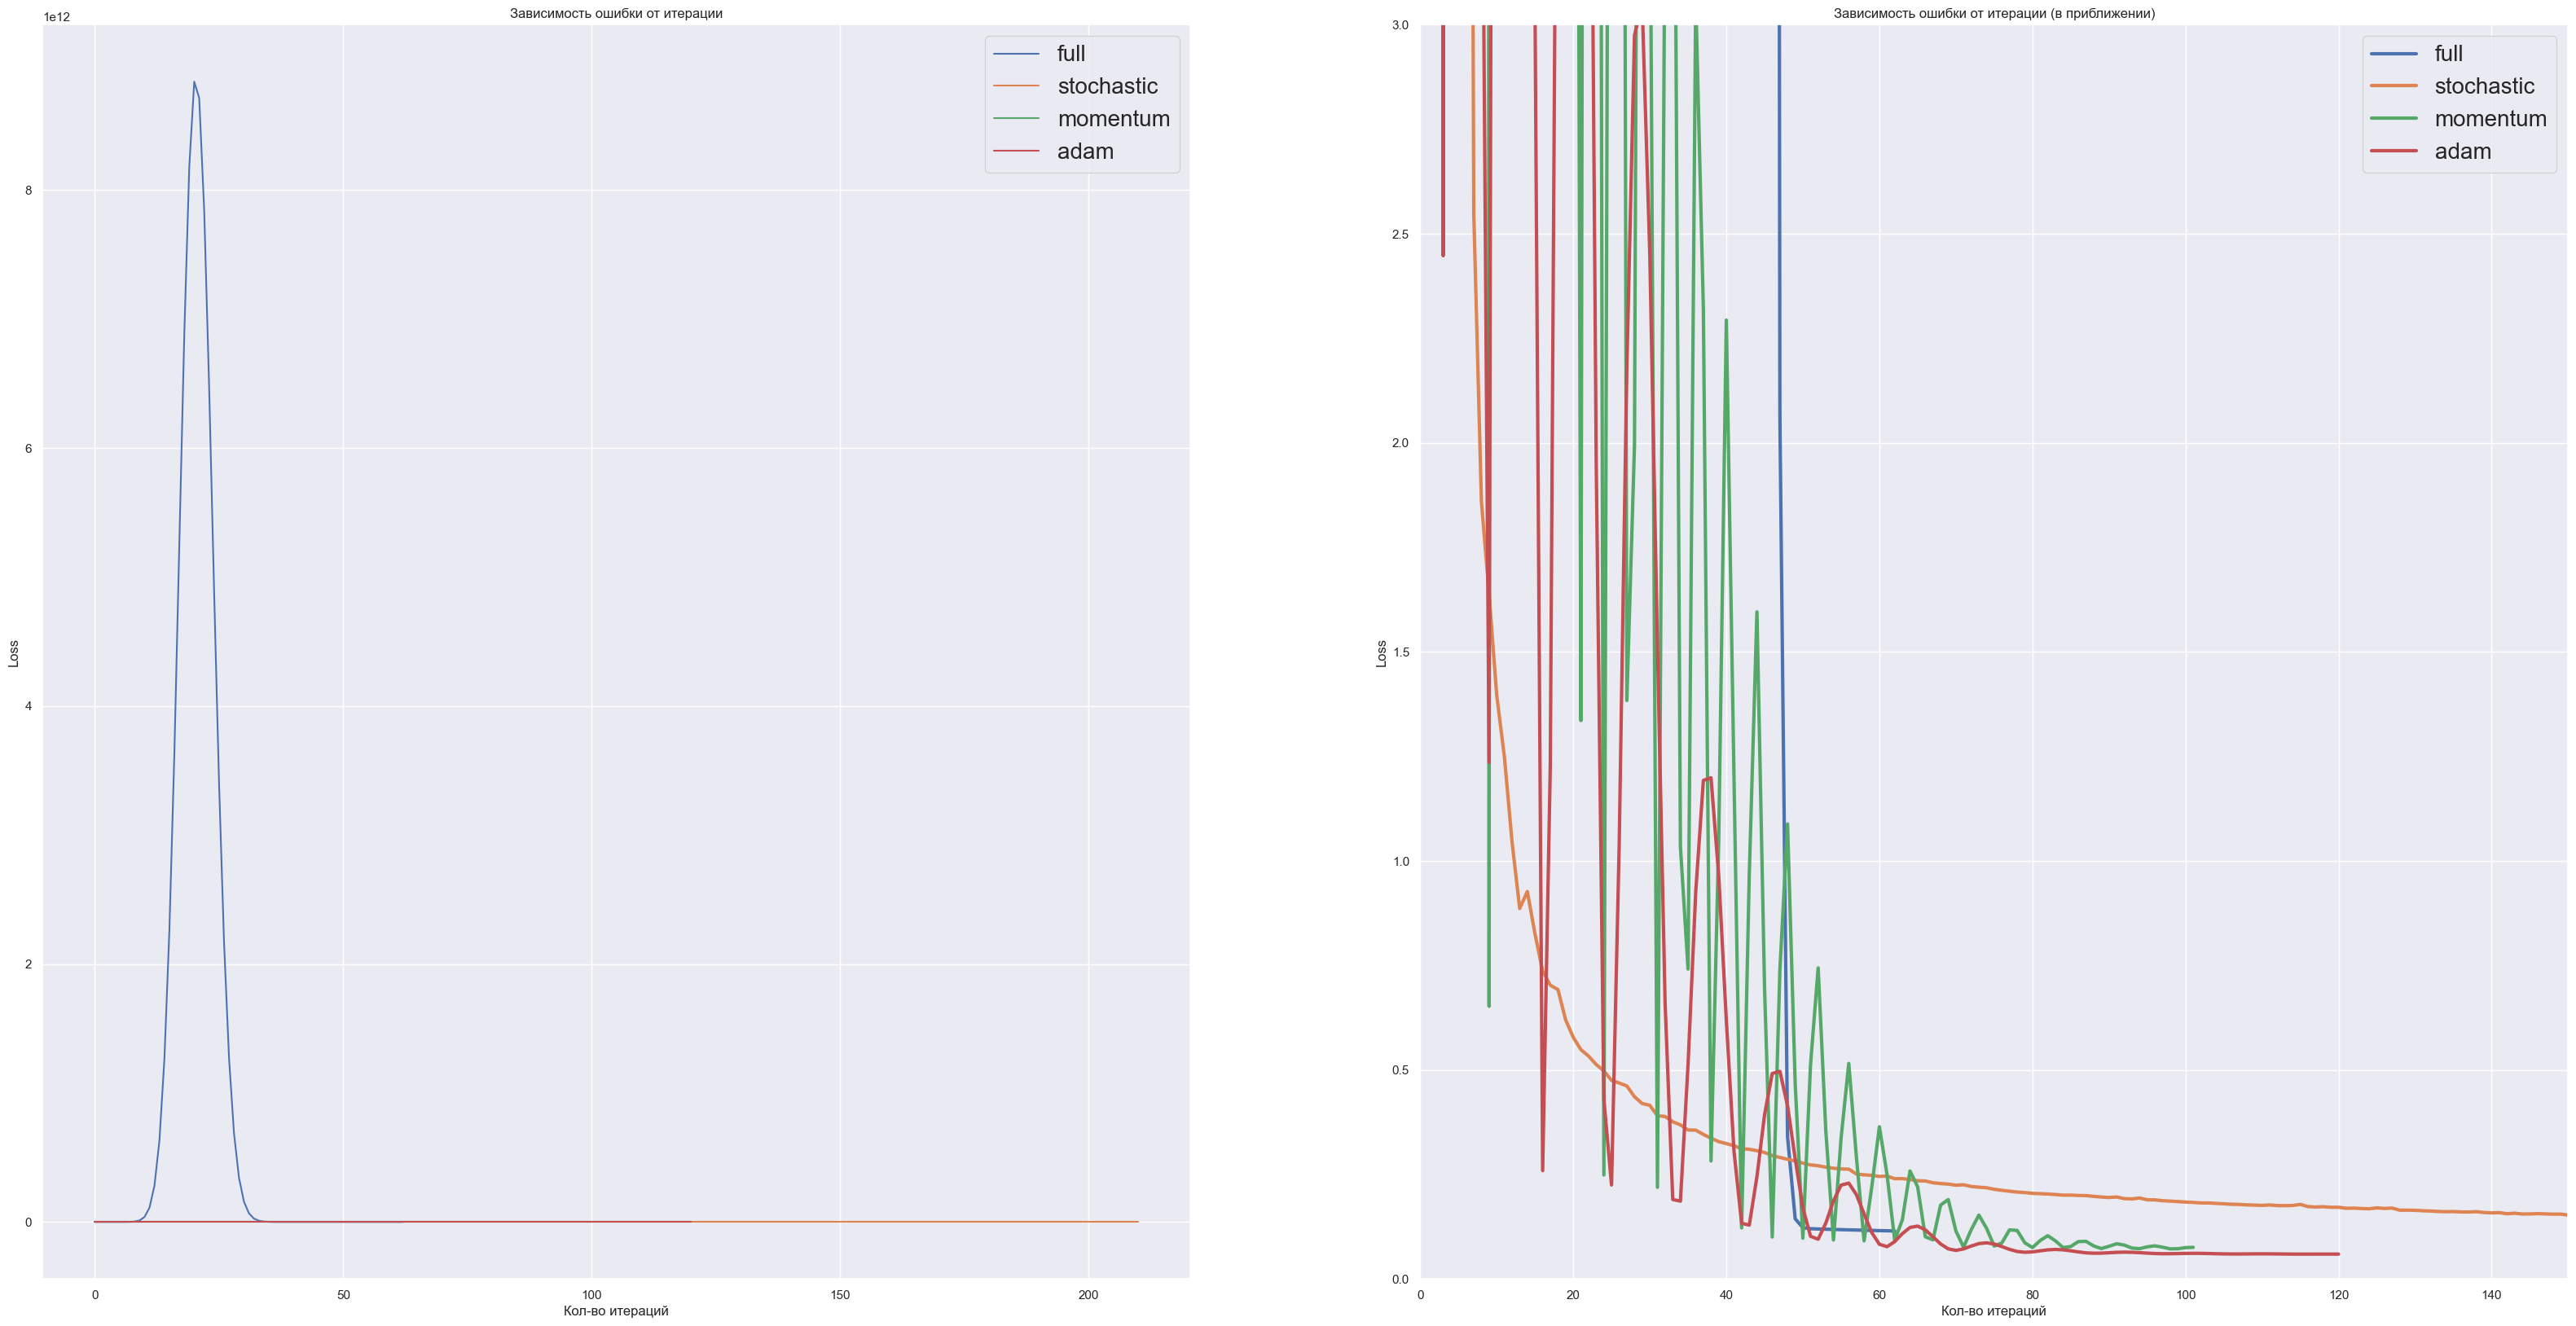

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(40,20))

for i in data_for_graphs.keys():

    ax[0].plot(data_for_graphs[i], label=i)
    ax[0].legend(prop={'size': 20})
    ax[0].set_xlabel('Кол-во итераций')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Зависимость ошибки от итерации')

    ax[1].set_xlim(right=150)
    ax[1].set_ylim(top=3)
    ax[1].plot(data_for_graphs[i], label=i, linewidth=3)
    ax[1].legend(prop={'size': 20})
    ax[1].set_xlabel('Кол-во итераций')
    ax[1].set_ylabel('Loss')
    ax[1].set_title('Зависимость ошибки от итерации (в приближении)');

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [36]:
import time
np.random.seed(1)

batch_sizes = np.arange(5, 500, 10)

times_mean = []
iterations_mean = []


for i in batch_sizes:

    times = []
    iters = []

    for k in range(10):

        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
            'dimension': X_train_trns.shape[1],
            'batch_size': i,
            'lambda_': best_lambda[1]
            }
                }
        
        regression = LinearRegression(descent_config=descent_config, max_iter=np.inf)
        ### Я тут снял ограничения на количество итераций, чтобы посмотреть реальное количество итераций до сходимости ###

        start_time = time.time()

        regression.fit(X_train_trns.values, y_train.values)

        end_time = time.time()

        times.append(end_time - start_time)
        iters.append(regression.iterat)

    times_mean.append(np.mean(times))
    iterations_mean.append(np.mean(iters))



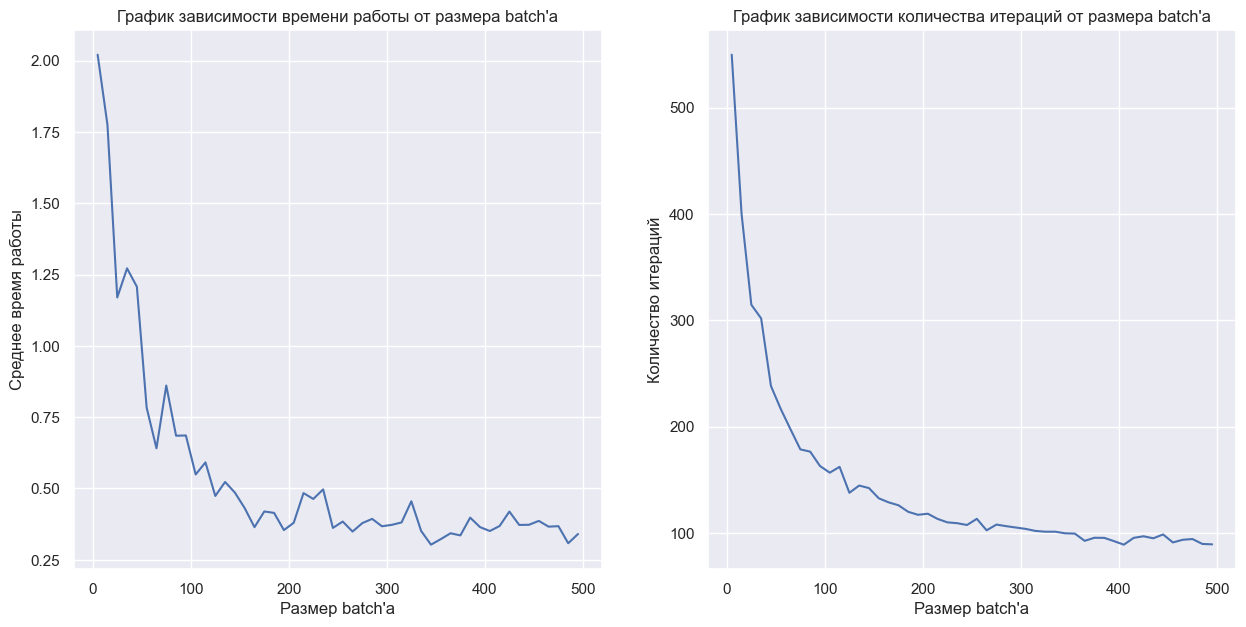

In [37]:
figure, ax = plt.subplots(1, 2, figsize=(15,7))

sns.lineplot(y=times_mean, x=np.arange(5, 500, 10), ax=ax[0])
ax[0].set_xlabel("Размер batch'а")
ax[0].set_ylabel('Среднее время работы')
ax[0].set_title("График зависимости времени работы от размера batch'а")

sns.lineplot(y=iterations_mean, x=np.arange(5, 500, 10), ax=ax[1])
ax[1].set_xlabel("Размер batch'а")
ax[1].set_ylabel('Количество итераций')
ax[1].set_title("График зависимости количества итераций от размера batch'а");

## <div style='color:red'>Вывод:</div> 
#### Результаты получились довольно предсказуемыми, посколько при увеличении размера batch'a требуется большее количество итераций до сходимости, отсюда и следует вывод, что и работа стохастического градиентного спуска будет дольше

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

>#### $$ \nabla Q(w) = \frac{2}{l}X^T(Xw - y) + \mu w $$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: 96452909

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [38]:
mus = np.logspace(-15, 1, 5)

best_lambda_arr = []
best_mu_arr = []

for model in ['full', 'stochastic', 'momentum', 'adam']:

    best_lambda = None
    best_mu = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'mu', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:

        for muu in mus:

            descent_config = {
                'descent_name': model,
                'regularized': True,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': lambd,
                    'mu': muu
                }
            }

            regression = LinearRegression(descent_config=descent_config)
            regression.fit(X_train_trns.values, y_train.values)

            loss = regression.calc_loss(X_val_trns.values, y_val.values)
            

            if loss < loss_best:

                loss_best = loss
                best_lambda = lambd
                best_mu = muu

    best_lambda_arr.append(best_lambda)
    best_mu_arr.append(best_mu)

    descent_config = {
                'descent_name': model,
                'regularized': True,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': best_lambda,
                    'mu': best_mu
                }
            }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)

    mse_train = regression.calc_loss(X_train_trns.values, y_train.values)
    mse_test = regression.calc_loss(X_test_trns.values, y_test.values)
    r2_train = r2_score(y_train.values, regression.predict(X_train_trns.values))
    r2_test = r2_score(y_test.values, regression.predict(X_test_trns.values))
    it = regression.iterat

    new_data = pd.DataFrame([[best_lambda, best_mu, mse_train, mse_test, r2_train, r2_test, it]], columns=['alpha', 'mu','train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)

full


alpha     mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  1.832981  0.001   0.184911  0.196283   0.550545  0.527281       253

stochastic


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  0.78476  1.000000e-15   0.335405  0.356469   0.184747  0.141495       300

momentum


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  1.832981  1.000000e-11   0.067066  0.071197   0.836985  0.828531       147

adam


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332  1.000000e-11   0.059159  0.061871   0.856204  0.850992       120

In [39]:
data_for_graphs_2 = dict()
models = ['full', 'stochastic', 'momentum', 'adam']
    
for i in range(4):
    descent_config = {
                    'descent_name': models[i],
                    'regularized': True,
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'lambda_': best_lambda_arr[i],
                        'mu': best_mu_arr[i]
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_graphs_2[models[i]] = losses

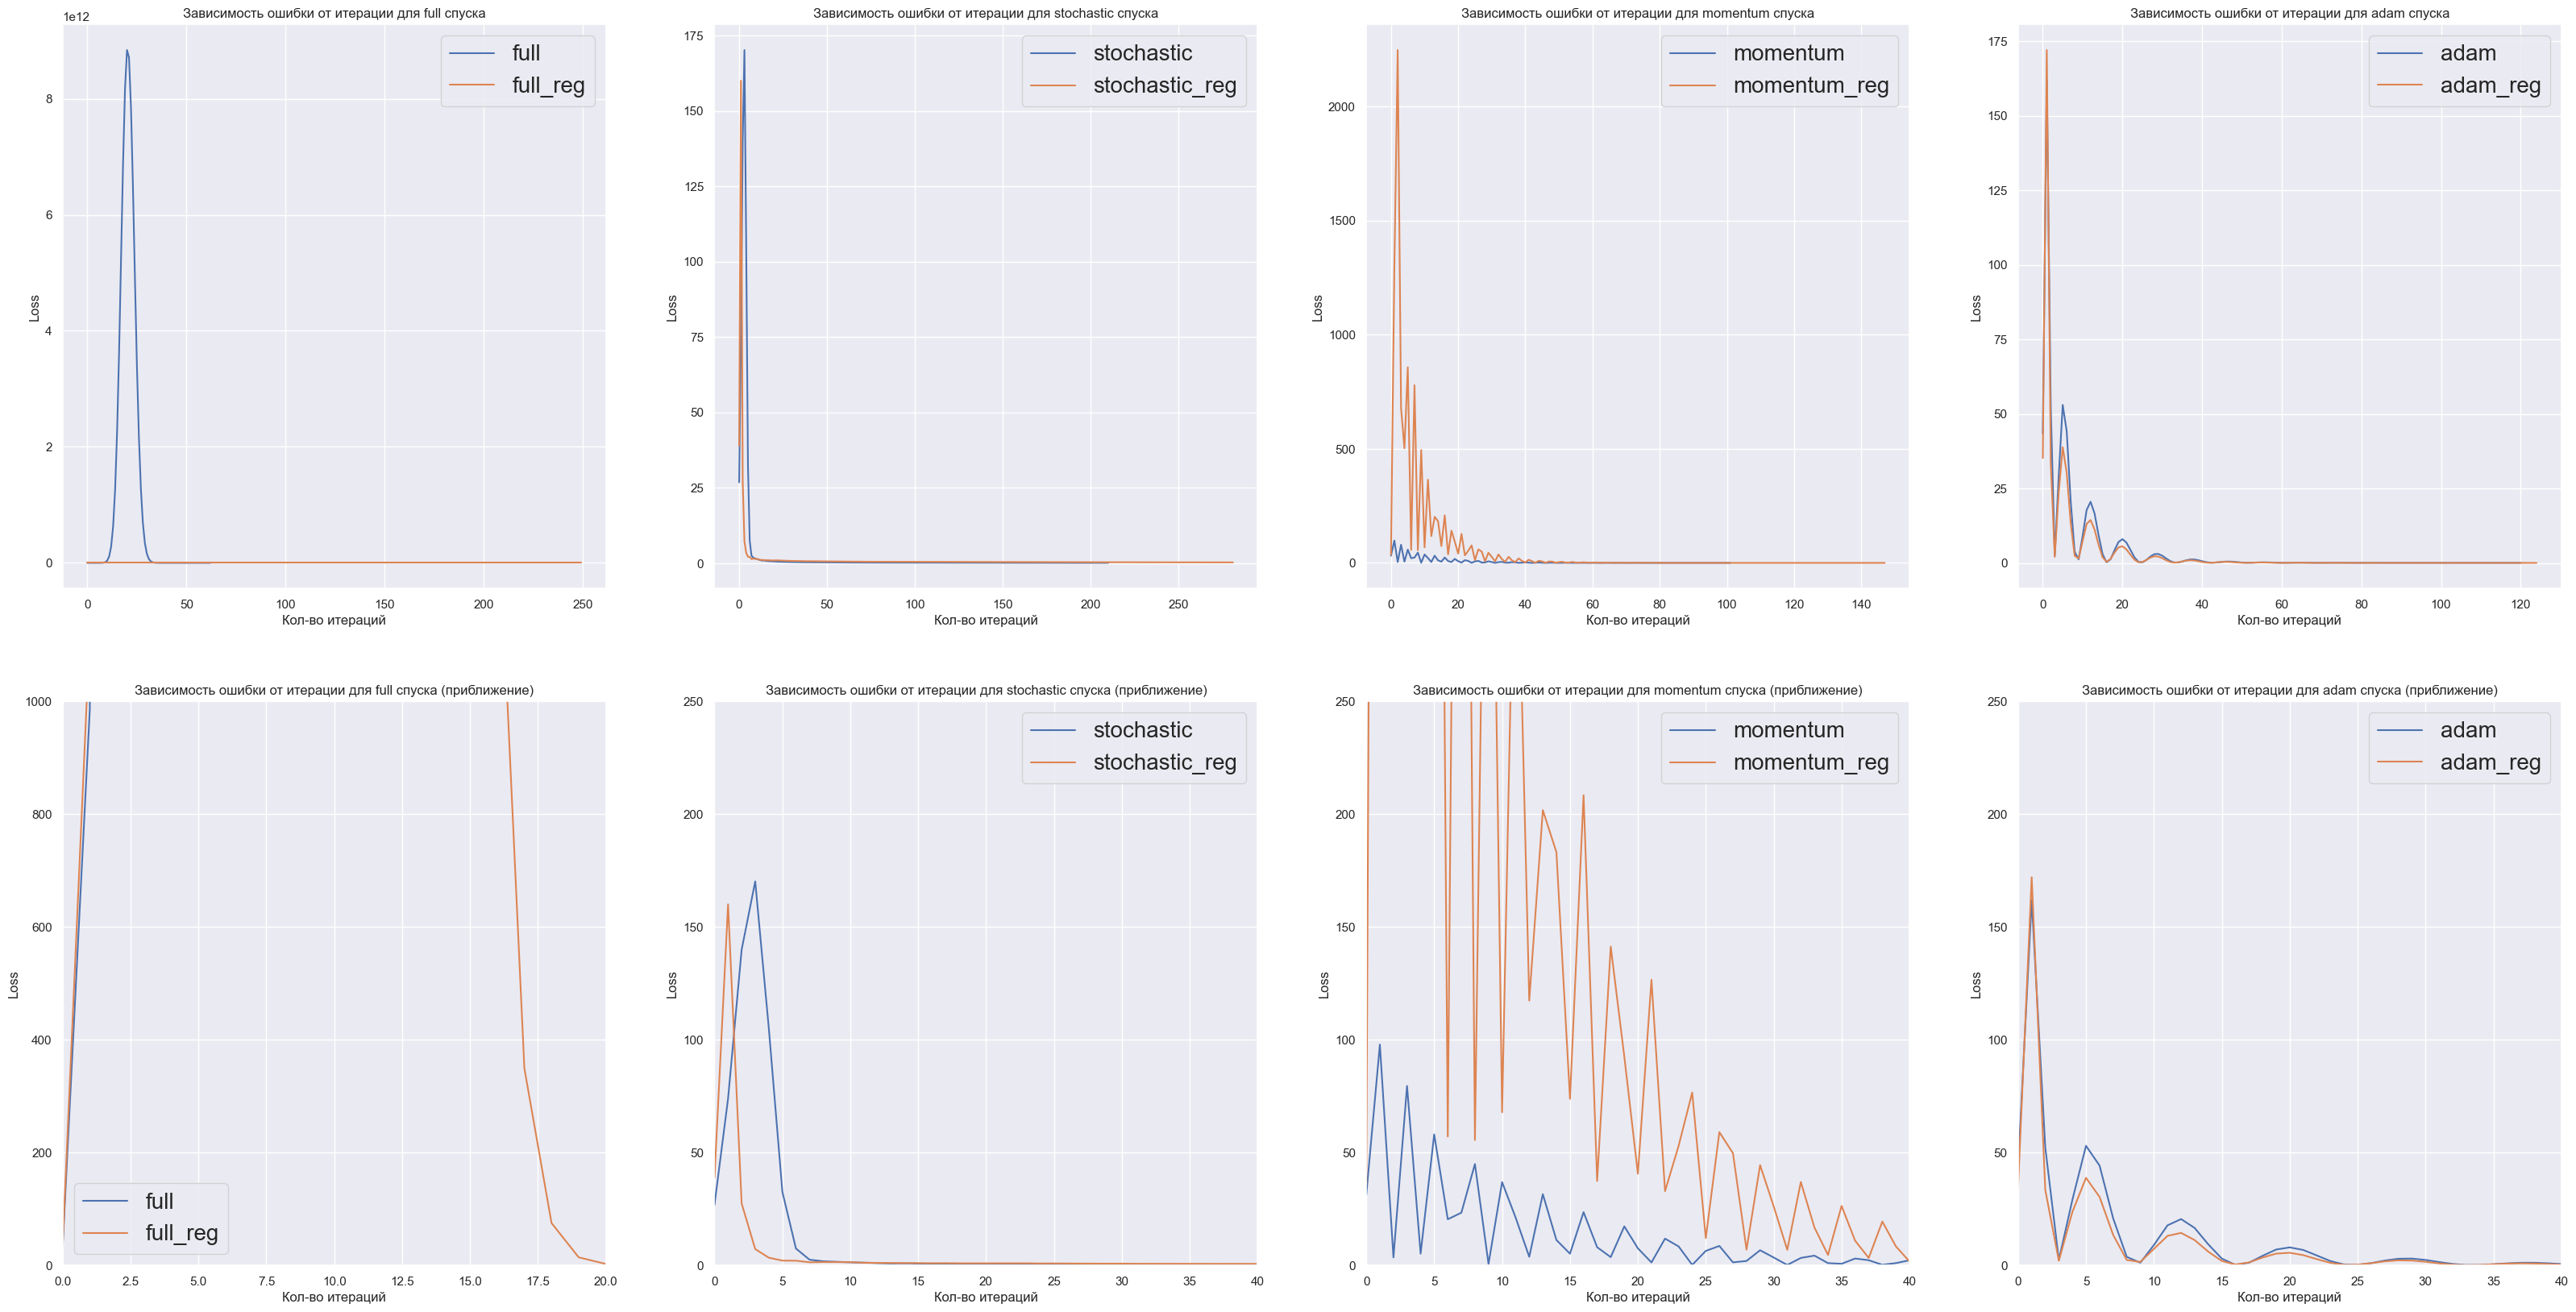

In [40]:
fig, ax = plt.subplots(2, 4, figsize=(40,20))

for i in range(len(models)):

    ax[0][i].plot(data_for_graphs[models[i]], label = models[i])
    ax[0][i].plot(data_for_graphs_2[models[i]], label = f'{models[i]}_reg')
    ax[0][i].legend(prop={'size': 20})
    ax[0][i].set_xlabel('Кол-во итераций')
    ax[0][i].set_ylabel('Loss')
    ax[0][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска')

    ax[1][i].set_xlim(right=40)

    if models[i] == 'momentum' or models[i] == 'adam' or models[i] == 'stochastic':
        ax[1][i].set_ylim(top=250)
    elif models[i] == 'full':
        ax[1][i].set_xlim(right=20)
        ax[1][i].set_ylim(top=1000)
    
    ax[1][i].plot(data_for_graphs[models[i]], label = models[i])
    ax[1][i].plot(data_for_graphs_2[models[i]], label = f'{models[i]}_reg')
    ax[1][i].legend(prop={'size': 20})
    ax[1][i].set_xlabel('Кол-во итераций')
    ax[1][i].set_ylabel('Loss')
    ax[1][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска (приближение)')

## <div style='color:red'> Ответ: </div>

- #### _**Качество модели**_

    #### Исходя из полученных метрик после применения регуляризации качество моделей ухудшилось. Это может быть связано с тем, что, во-первых, в моделях без регуляризации не было недообучения / переобучение, поэтому использование регуляризации может не иметь смысла, во-вторых, в силу ограниченности ресурсов перебор коэффициента регуляризации с широким диапозоном и большим количеством перебираемых значений крайне трудозатратно и, вероятнее всего, это тоже может быть причиной ухудшения качества. MSE и $ R^2 $ ухудшились как на обучающей, так и на тестовой выборках. Однако метрики для <code>momentum</code> и <code>adam</code> спусков улучшились. Это может быть связано с тем, что градиенты в этих моделях поправляются на некоторые динамические коэффициенты, поэтому регуляризация помогает сгладить изменения весов за счет сглаживания изменения градиента 

- #### _**Сходимость**_

    #### На основе получившихся графиков можно прийти к выводу, что скорость сходимости уменьшилось и большинству моделей с регуляризацией потребовалось большее количество итераций, чем моделям без нее

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

#### $$ a = Xw $$

#### $$ \partial L = \langle \nabla_w L \; , \; \partial w \rangle$$

#### $$ \partial L = tanh(Xw - y) \; \partial{(Xw - y)} = \langle tanh(Xw - y)X \; , \; \partial w \rangle $$

>#### $$ \nabla_w L = tanh(Xw - y)X $$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [41]:
best_lambda_logcosh = []

for model in ['full', 'stochastic', 'momentum', 'adam']:

    opt_lambda = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:

        descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'loss_function': LossFunction.LogCosh,
                    'lambda_': lambd
                }
            }

        regression = LinearRegression(descent_config=descent_config)

        regression.fit(X_train_trns.values, y_train.values)

        loss = regression.calc_loss(X_val_trns.values, y_val.values)

        if loss < loss_best:

            opt_lambda = lambd
            loss_best = loss

    best_lambda_logcosh.append(opt_lambda)

    descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'loss_function': LossFunction.LogCosh,
                    'lambda_': opt_lambda
                }
            }

    regression = LinearRegression(descent_config=descent_config)

    regression.fit(X_train_trns.values, y_train.values)
    

    scnd_clmn = r2_score(y_train.values, regression.predict(X_train_trns.values))
    thrd_clmn = r2_score(y_test.values, regression.predict(X_test_trns.values))
    mse_train = regression.calc_loss(X_train_trns.values, y_train.values)
    mse_test = regression.calc_loss(X_test_trns.values, y_test.values)


    it = regression.iterat

    new_data = pd.DataFrame([[opt_lambda, mse_train, mse_test, scnd_clmn, thrd_clmn, it]], columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)

full


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.044066  0.045146   0.769504  0.765317       173

stochastic


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.037609   0.03867   0.807078  0.802882       300

momentum


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.029346  0.030232   0.850426  0.846827       180

adam


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.028061  0.029081    0.85718  0.852653       155

In [42]:
data_for_graphs_3 = dict()
models = ['full', 'stochastic', 'momentum', 'adam']
    
for i in range(4):
    descent_config = {
                    'descent_name': models[i],
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'loss_function': LossFunction.LogCosh,
                        'lambda_': best_lambda_logcosh[i]
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_graphs_3[models[i]] = losses

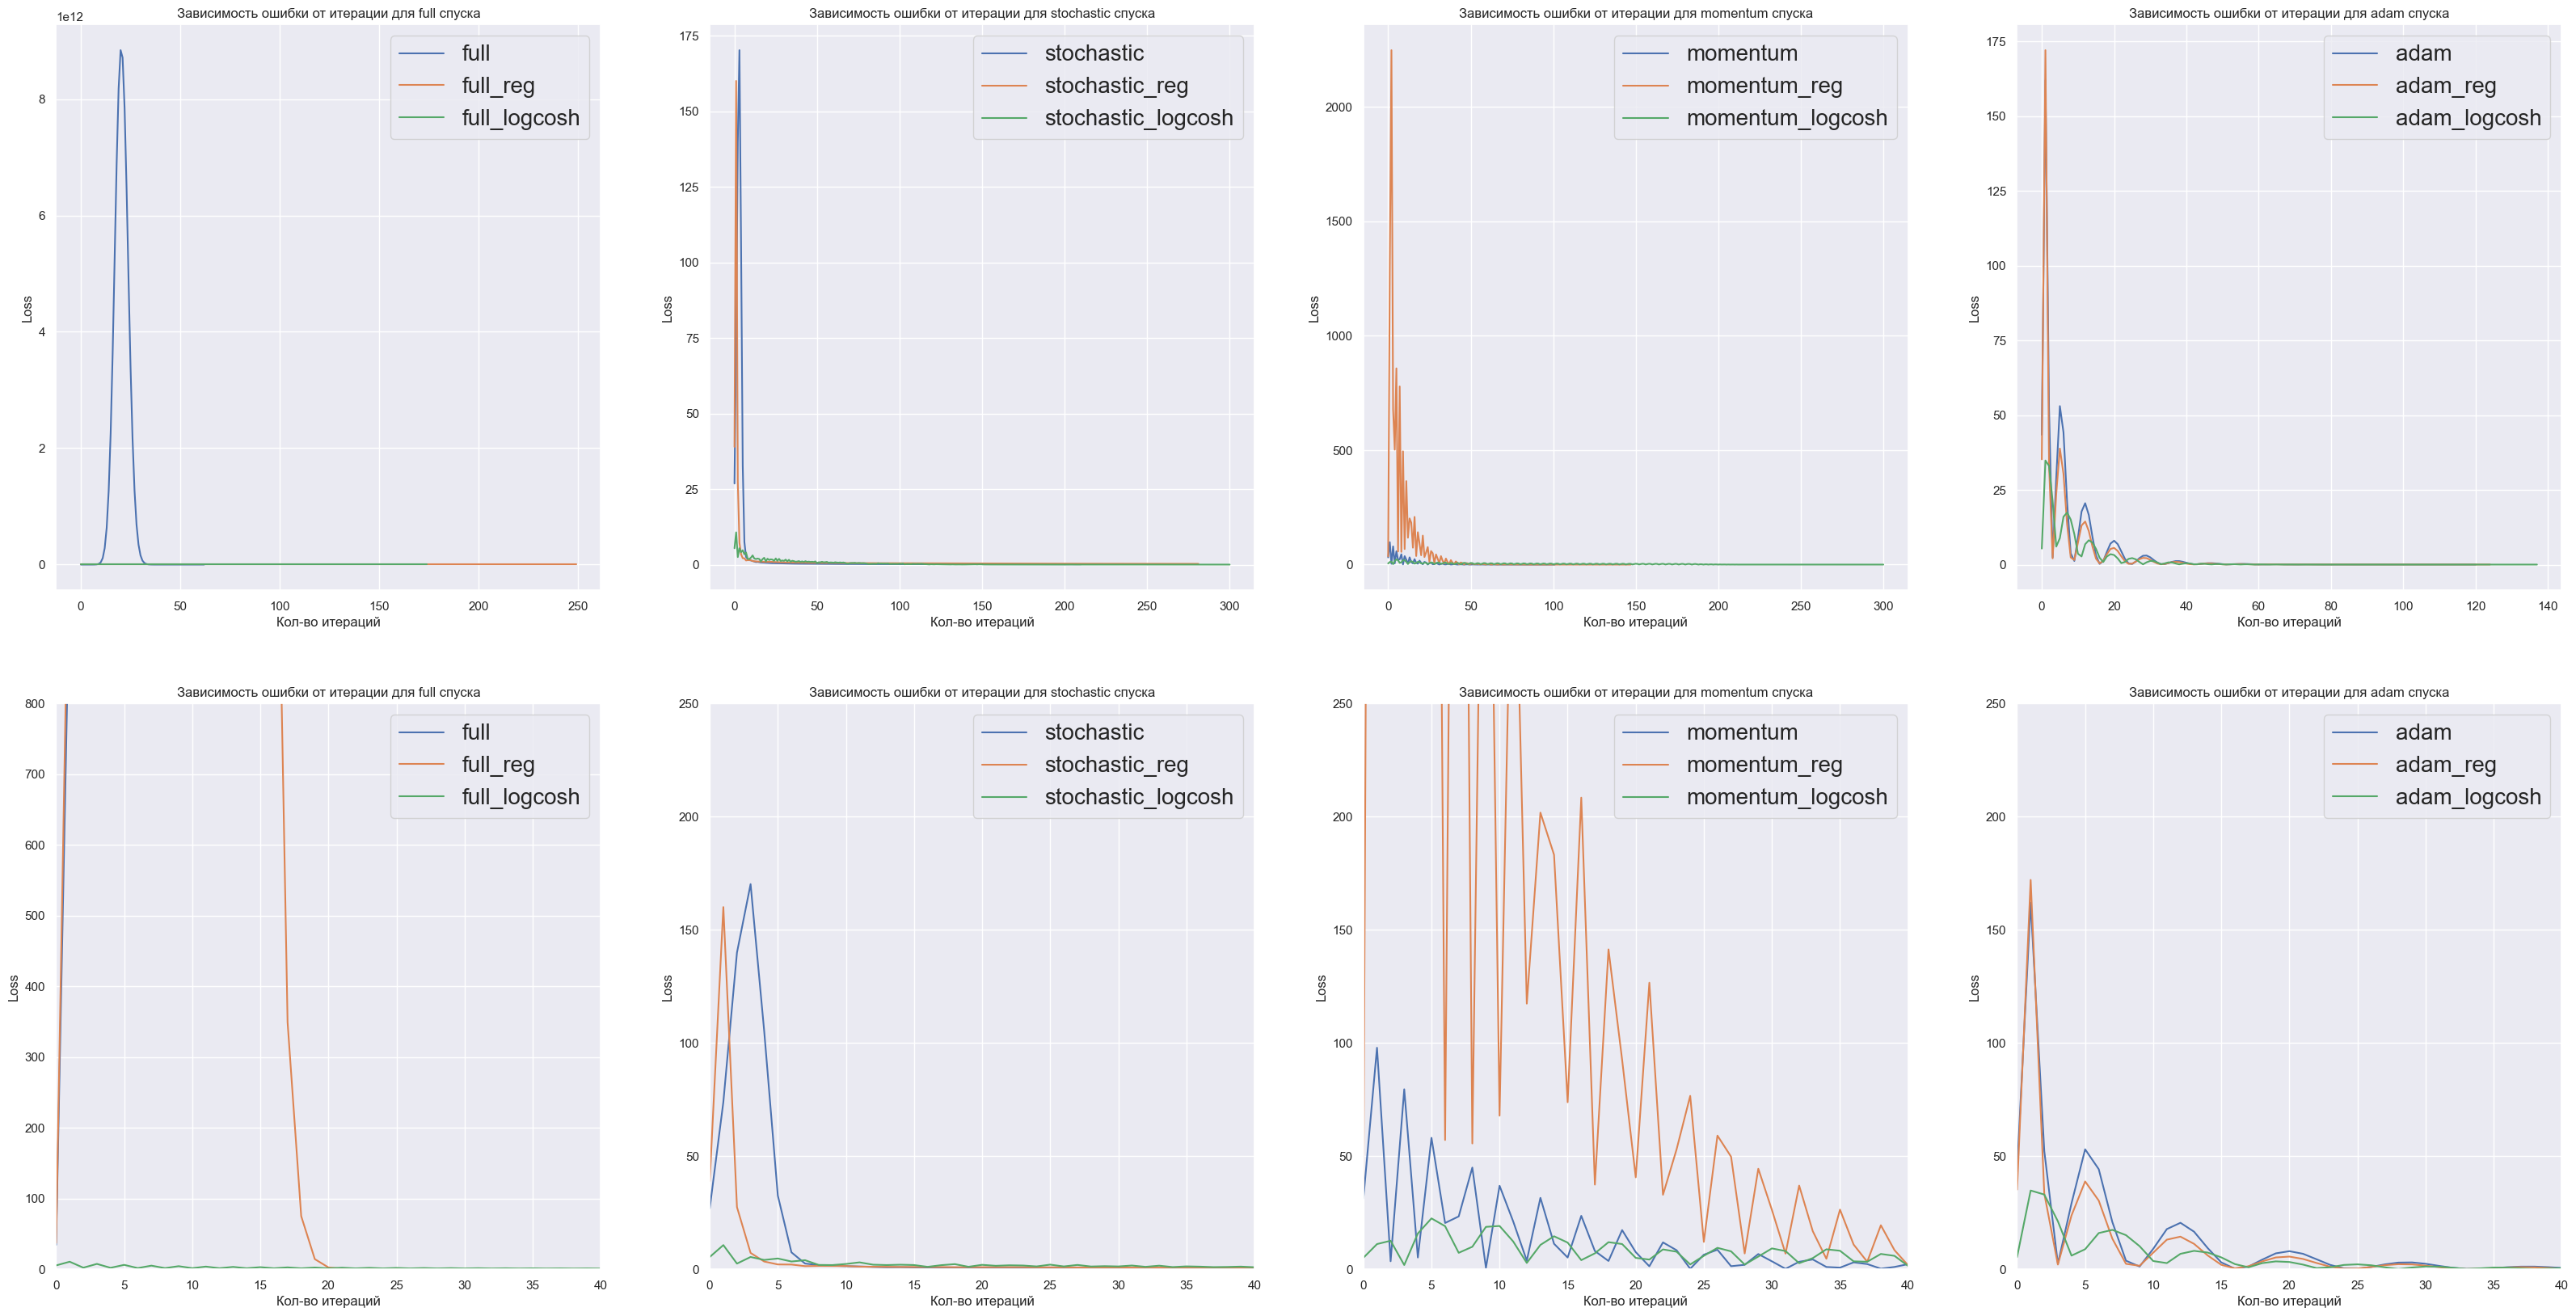

In [43]:
fig, ax = plt.subplots(2, 4, figsize=(40,20))

for i in range(len(models)):

    ax[0][i].plot(data_for_graphs[models[i]], label = models[i])
    ax[0][i].plot(data_for_graphs_2[models[i]], label = f'{models[i]}_reg')
    ax[0][i].plot(data_for_graphs_3[models[i]], label = f'{models[i]}_logcosh')

    ax[0][i].legend(prop={'size': 20})
    ax[0][i].set_xlabel('Кол-во итераций')
    ax[0][i].set_ylabel('Loss')
    ax[0][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска')

    ax[1][i].set_xlim(right=40)

    if models[i] == 'momentum' or models[i] == 'adam' or models[i] == 'stochastic':
        ax[1][i].set_ylim(top=250)
    elif models[i] == 'full':
        ax[1][i].set_ylim(top=800)

    ax[1][i].plot(data_for_graphs[models[i]], label = models[i])
    ax[1][i].plot(data_for_graphs_2[models[i]], label = f'{models[i]}_reg')
    ax[1][i].plot(data_for_graphs_3[models[i]], label = f'{models[i]}_logcosh')

    ax[1][i].legend(loc='upper right', prop={'size': 20})
    ax[1][i].set_xlabel('Кол-во итераций')
    ax[1][i].set_ylabel('Loss')
    ax[1][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска')

## <div style='color:red'>Вывод:</div>
#### На основании полученных метрик можно сделать вывод, что минимизация LogCosh'a значительно улучшила метрики, особенно для <code>stochastic</code> спуска, его метрики стали лучше, чем у <code>full</code> спуска. Напомню, что при обучении моделей, основанных на минимизации MSE, <code>stochastic</code> спуск показывал наихудший результат. Если говорить про скорость сходимости, то в 3 из 4 случаев он быстрее выходит на асимптоту, чем модели с / без регуляризации, но также модели с минимизацией LogCosh требует большее количество итераций до сходимости для <code> stochastic </code> и <code> adam </code> спусков

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

#### Рацион, который я могу "приготовить", очень маленький, поэтому я решил приготовить блины. Я не какой-то опытный повар, поэтому пользовался рецептом из интернета 

#### Вот [рецепт](https://art-lunch.ru/recipe/tonkie-bliny-na-moloke_foto/?ysclid=lopx9u0mhc227795710)

#### А вот Иван, которому я дал попробовать свое творение. Комментарии Ивана по поводу получившегося результата: "Получилось балдежно". Думаю, Ивану понравилось

<center>
<img src="https://lh3.googleusercontent.com/fife/AK0iWDzWGpZQOmYwExsmIvYAkC9FsD54jH7Hf7SXnob69F8INVON6RPcEJJjbwptycxtr46dsX2BTDFl7UAXbgP7vMRXwxXQ-QkDqGoR9DWj0LB4msbfJjZ_eH2dhTPP65OYGc5lZ_R_QbK6ZDp4z95q5NJDpUaZ9xtsckPz03FB6RSRFa_dzFw30_ggh9FG7iPnxAHOz-lDjKBVV_FwFgqdtmSSpHpsnJFSTLvYLIF9TympxNb_ftLituft5BhAmmcnFz0EKS9kvOkCwRKNP9MUpu3aS1cKkRpIk8n22lI2CGrr-vvRLW_-LFhqkNuoQhpBnm1kOSF4dvYZ-tj-h9OI1gqbhnfSfyj7OZjRlxx2i0D9MpO54JOKpLRG_UIhxR8ceiYjTylqag1kAptD4gr7elb_vDQeNM9Gz9th88TVDaAV2z69BysCDa7BllzXZVceBNh6AfVAbLXb5hcRN86ncWenWhDvFEd7SInUibe7QGmA5042kczYQ6K8JrB6K2dgAKVDQ6Kc2--d4Tr6wH5spakQ-mdbg3PO20CwexJct0fQnmswHDdKbQl99QzVk0jKDD6DFN7SBKsb-zX0XhC1QAcIubbMMtVE_YQN6lE53M4L28QyNzjvs2ufi4W8Lx6tV__29hhsaBp-Q_KjWv-kLVvxa-3WcmDhjglayaeWg0HwZ5ShTMp8WvkW7XBdEPfdJv08iwDxrJMBqP9KOkdhgLXlmpXVA2qqrknjBnf8aAd-OfR9xeasbQ3Lthd0xTpFhWg37IwldDwy5IqLsxaOf4IGJY2adr3zMleX5n_ibr__F2L1-LOa0IqahhIxf5ah1pVdJ-YyyYgXJTicNlq3HexC59B5KaM7F76Dk4w7JEmf8TUJeYu1FBpLKEr80TBEz1EUUeLLXdshK1nLtL8zh-RJJpUxcxYCSflDSmKJEgHAGz8phA_KfkxPZeLaMvUqM-Fu7fsFnG5cxMF3bApXHNzjddfEmcqFLSCw2vlJrxmSO9sHJaxbI44Xtf2K4zNFip--K_rkxwITbJBaQy98ljSLJ3TZHSr2KuTalsWUBpKw3aARgXZl48tKFfyZam0gPs0ZoSYKArpCuRdbQRmr6zejSoLMGJh4ehzM3GOyrVsNfv9Q0JtOobhxCOVEiaglWRXGWsRYJ5Niz663pv6X1UAcqf0D2dFUFC8EUivZ1xyi5mazmH7CEkNsBS-WLKXbI4VECt6kKchHLkDtYa1BghICu5dQ1hMQVXQBiRzcJr5II9OhDBASF8lujhVe1CqkkNGH5KRTo4zEhBfnDQZbk_QNPvHv9Yu5GxcYux7hQsHE8GS2j-xaoDK4gQSXfEkPEDDrwL_vTVJdV_aNvUMu65rpwxLa7cyqU5tpmVeaO6kJwTM2ahy9MV1SV03190T1sTJKiaW7wVgiT6k77UiI6vUEHYZwY5DcwxhItznIT8x_oub4QY06nicytbLlJYn2Yph3Jj_lqXwQdBozD9saZQUk-wkauAFPTnPHDoOktx3eOU3EnI8fJQk8F7JFors_-HFubvGLUffkjFDUUkUpjk2U8-szP-PleSPolg2bTMIbbCmUsYsn7qNxPz-XZmFwzdc3LWMgYXlL9Oud2aLVQSLm=w2928-h1736" alt="Ивааан" width="600" height="600" >

</center>

#### Мне не понравилось готовить, надеюсь, мне больше не придется это делать  

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

<center>

## **Nadam**

</center>

#### $$ m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla_w Q(w_t) $$
#### $$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla_w Q(w_t))^2 $$
#### $$ \hat m_t = \frac{m_t}{1-\beta_1^t}$$
#### $$ \hat v_t = \frac{v_t}{1-\beta_2^t}$$
>#### $$ w_{t} = w_{t-1} - \frac{\eta}{\sqrt{\hat v_t} + \epsilon}(\beta_1 \hat m_t + \frac{(1-\beta_1)\nabla_w Q(w_t)}{1 + \beta_1^t}) $$

<center>

## **AdaMax**

</center>

#### $$ m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla_w Q(w_t) $$
#### $$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla_w Q(w_t))^2 $$
#### $$ \hat m_t = \frac{m_t}{1-\beta_1^{t-1}}$$
#### $$ u_t = max(\beta_2 v_{t-1}, |\nabla_w Q(w)|) $$
> #### $$ w_{t+1} = w_t - \eta \frac{\hat{m_t}}{u_t + \epsilon} $$

<center>

## **AMSGrad**

</center>

#### $$ m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla_w Q(w_t) $$
#### $$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla_w Q(w_t))^2 $$
#### $$ \hat v_t = max(\hat v_{t-1}, v_t) $$
> #### $$ w_{t+1} = w_t - \eta \frac{m_t}{\sqrt{\hat v_t + \epsilon}} $$

[источник](https://russianblogs.com/article/27001602123/)


In [45]:
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from descents import get_descent, LossFunction
from linear_regression import LinearRegression


trainn = column_transformer.fit_transform(X_train)
vall = column_transformer.transform(X_val)
testt = column_transformer.transform(X_test)

feats = column_transformer.get_feature_names_out()


X_train_trns = pd.DataFrame(trainn.toarray(), columns=feats)
X_val_trns = pd.DataFrame(vall.toarray(), columns=feats) 
X_test_trns = pd.DataFrame(testt.toarray(), columns=feats) 


best_lambda = []

for model in ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'amsgrad']:

    opt_lambda = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:

        descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': lambd
                }
            }

        regression = LinearRegression(descent_config=descent_config)

        regression.fit(X_train_trns.values, y_train.values)
        y_pred = regression.predict(X_val_trns.values)

        loss = regression.calc_loss(X_val_trns.values, y_val.values)

        if loss < loss_best:

            opt_lambda = lambd
            loss_best = loss

    best_lambda.append(opt_lambda)

    descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': opt_lambda
                }
            }

    regression = LinearRegression(descent_config=descent_config)

    regression.fit(X_train_trns.values, y_train.values)
    

    scnd_clmn = r2_score(y_train.values, regression.predict(X_train_trns.values))
    thrd_clmn = r2_score(y_test.values, regression.predict(X_test_trns.values))
    mse_train = regression.calc_loss(X_train_trns.values, y_train.values)
    mse_test = regression.calc_loss(X_test_trns.values, y_test.values)

    
    it = regression.iterat

    new_data = pd.DataFrame([[opt_lambda, mse_train, mse_test, scnd_clmn, thrd_clmn, it]], columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)

full


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  1.832981   0.112533  0.116869   0.726471  0.718538        72

stochastic


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  0.78476    0.14863  0.153031   0.638733  0.631446       215

momentum


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  0.78476   0.075108  0.078315   0.817438  0.811389       101

adam


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332   0.059257  0.061677   0.855968  0.851459       125

nadam


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  1.832981   0.059968  0.062569   0.854239  0.849311       163

adamax


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332   0.109207  0.114414   0.734555  0.724451       171

amsgrad


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  0.78476   0.059061  0.061427   0.856442  0.852061       106

In [46]:
data_for_nadam = dict()
models = ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'amsgrad']
    
for i in range(7):
    descent_config = {
                    'descent_name': models[i],
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'lambda_': best_lambda[i]
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_nadam[models[i]] = losses

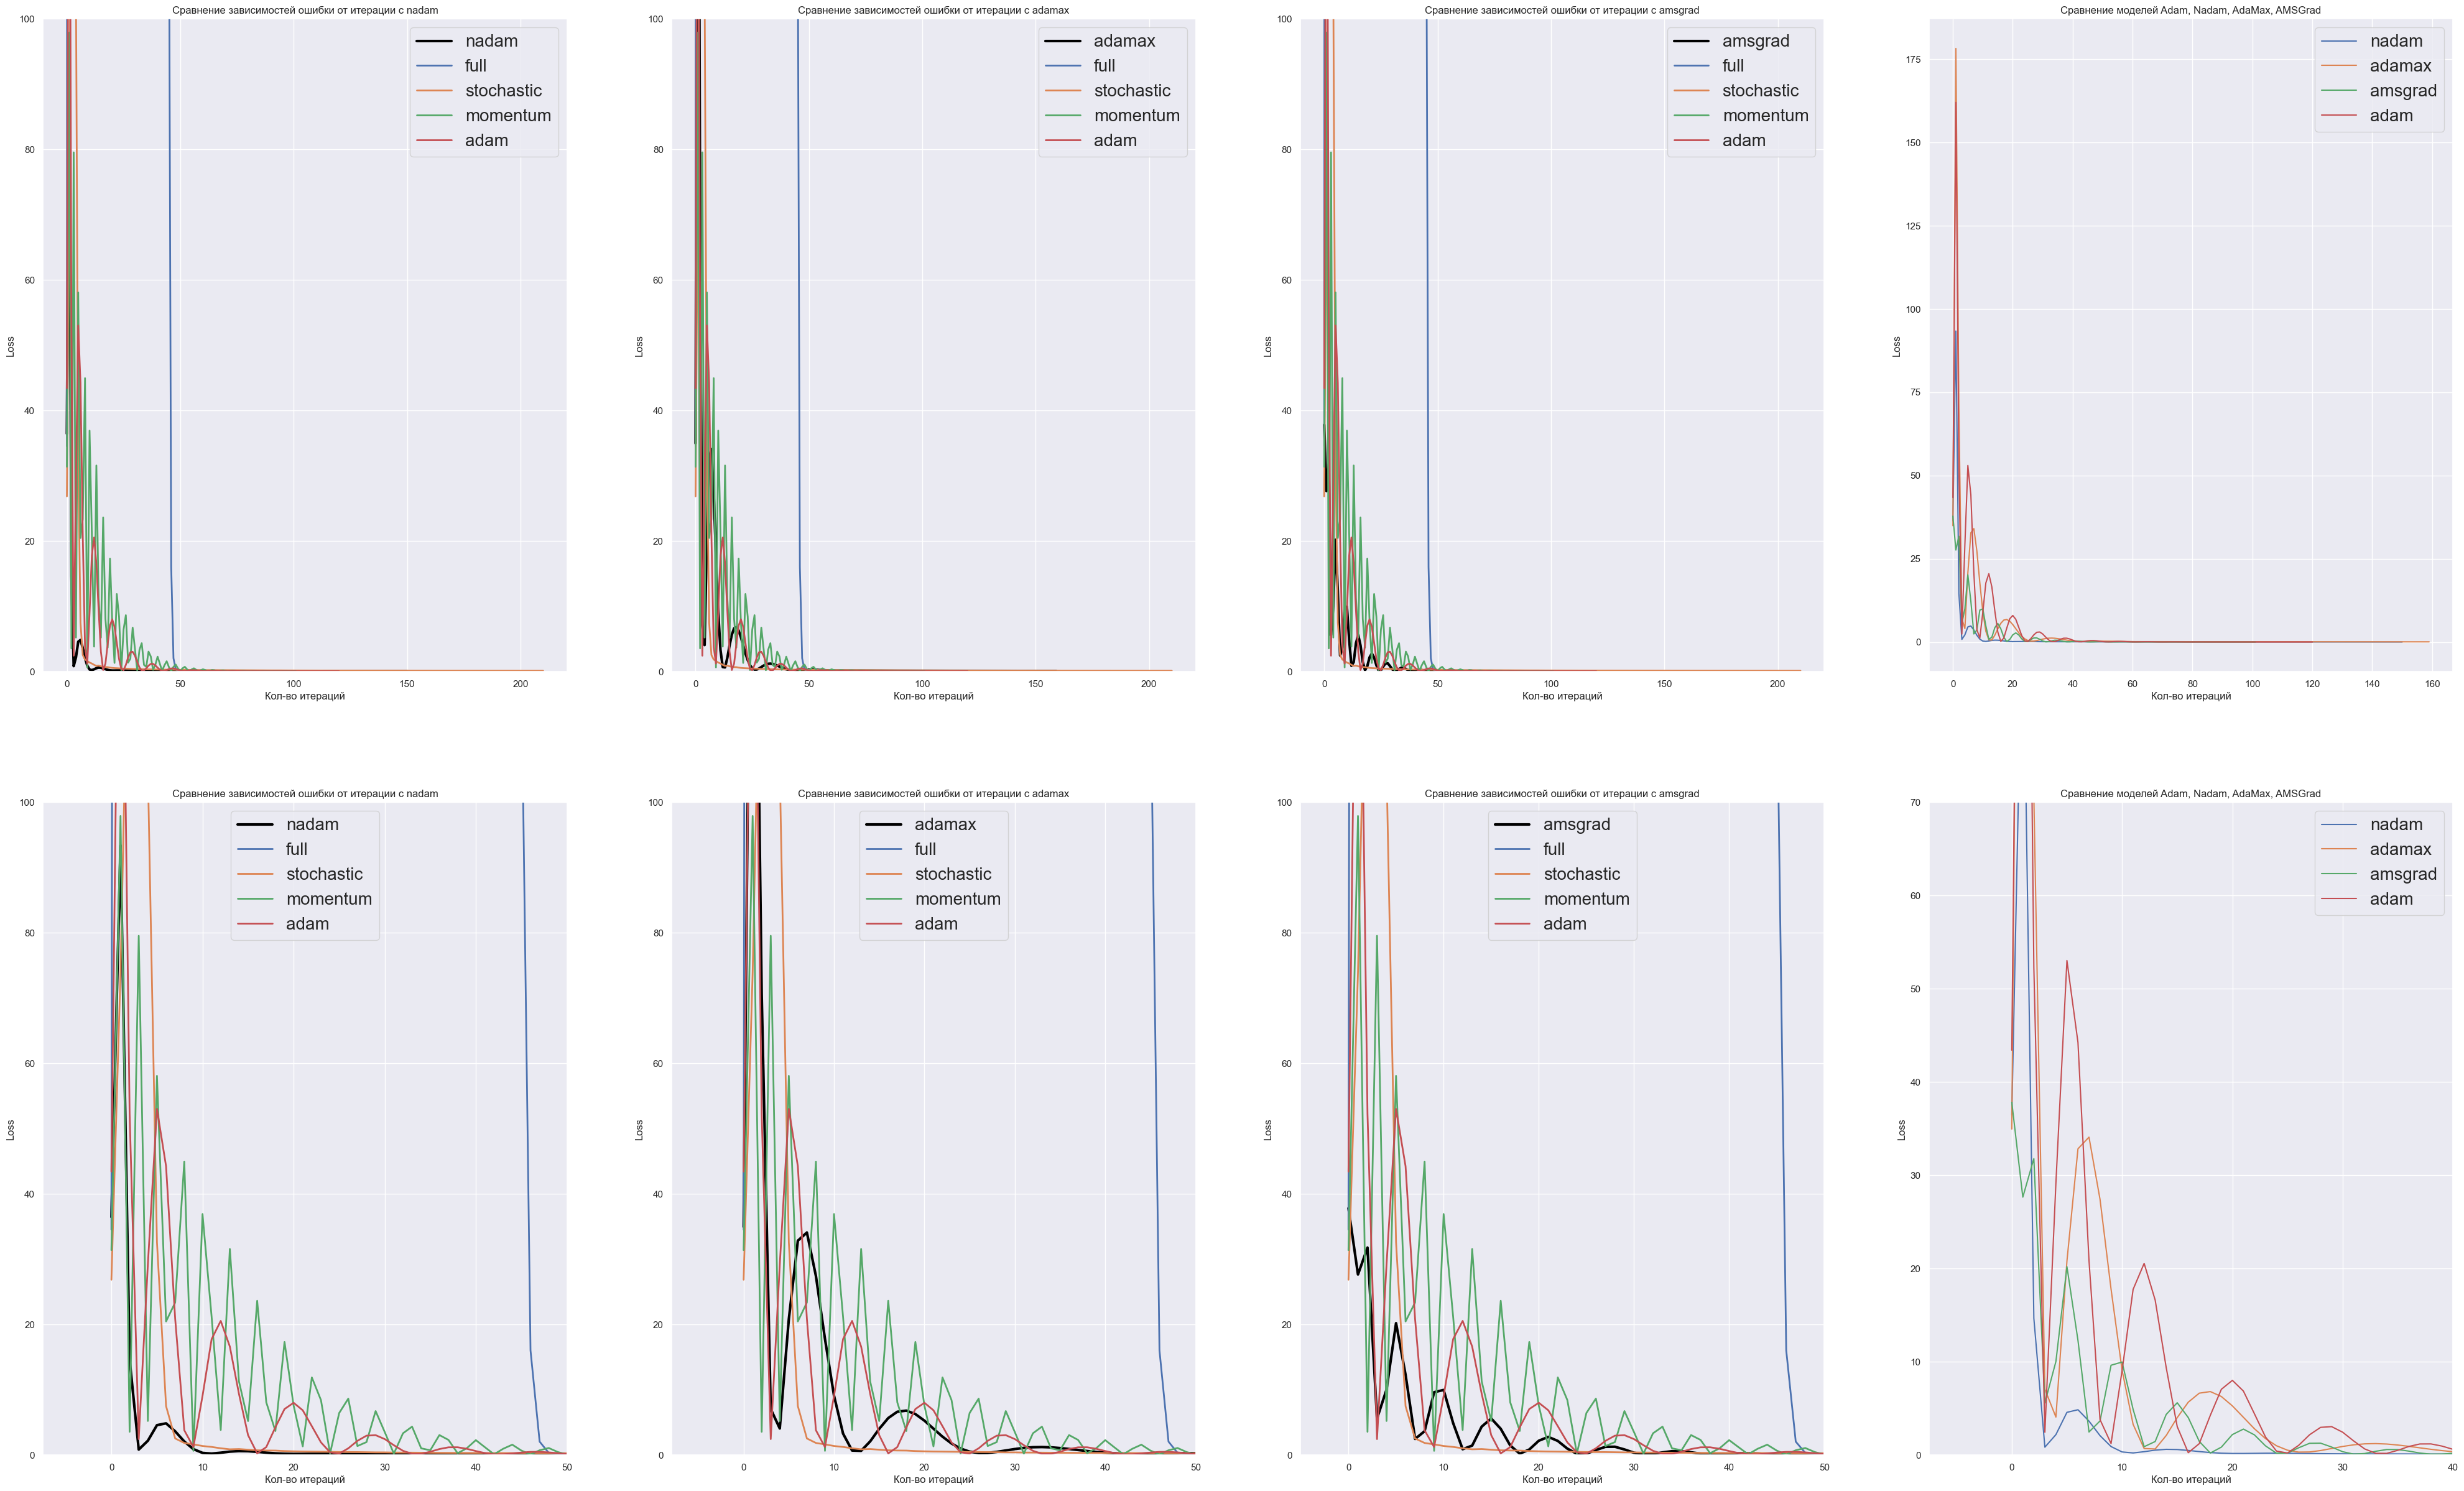

In [47]:
fig, ax = plt.subplots(2, 4, figsize=(50,30))
adams = ['nadam', 'adamax', 'amsgrad']


for k in range(3):

    ax[0][k].plot(data_for_nadam[adams[k]], label = f'{adams[k]}', color='black', linewidth=3)
    ax[1][k].plot(data_for_nadam[adams[k]], label = f'{adams[k]}', color='black', linewidth=3)

    for i in range(len(models[:4])):

        ax[0][k].plot(data_for_graphs[models[i]], label = f'{models[i]}', linewidth=2)
        ax[0][k].legend(prop={'size': 20})
        ax[0][k].set_xlabel('Кол-во итераций')
        ax[0][k].set_ylabel('Loss')
        ax[0][k].set_title(f'Сравнение зависимостей ошибки от итерации с {adams[k]}')
        ax[0][k].set_ylim(top=100, bottom=0)

        ax[1][k].plot(data_for_graphs[models[i]], label = f'{models[i]}', linewidth=2)
        ax[1][k].legend(prop={'size': 20})
        ax[1][k].set_xlabel('Кол-во итераций')
        ax[1][k].set_ylabel('Loss')
        ax[1][k].set_title(f'Сравнение зависимостей ошибки от итерации с {adams[k]}')

        ax[1][k].set_ylim(top=100, bottom=0)
        ax[1][k].set_xlim(right=50)

    ax[0][3].plot(data_for_nadam[adams[k]], label = f'{adams[k]}')
    ax[0][3].legend(prop={'size': 20})
    ax[0][3].set_title('Сравнение моделей Adam, Nadam, AdaMax, AMSGrad')
    ax[0][3].set_xlabel('Кол-во итераций')
    ax[0][3].set_ylabel('Loss')


    ax[1][3].plot(data_for_nadam[adams[k]], label = f'{adams[k]}')
    ax[1][3].legend(prop={'size': 20})
    ax[1][3].set_ylim(top=70, bottom=0)
    ax[1][3].set_xlim(right=40)
    ax[1][3].set_title('Сравнение моделей Adam, Nadam, AdaMax, AMSGrad')
    ax[1][3].set_xlabel('Кол-во итераций')
    ax[1][3].set_ylabel('Loss')

ax[0][3].plot(data_for_graphs['adam'], label = f'adam')
ax[0][3].legend(prop={'size': 20});
ax[1][3].plot(data_for_graphs['adam'], label = f'adam')
ax[1][3].legend(prop={'size': 20});

<center>

## Вариации Adam с регуляризацией

</center>

In [49]:
from descents import get_descent, LossFunction
from linear_regression import LinearRegression

best_lambda_arr = []
best_mu_arr = []

for model in ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'amsgrad']:

    best_lambda = None
    best_mu = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'mu', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:

        for muu in mus:

            descent_config = {
                'descent_name': model,
                'regularized': True,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': lambd,
                    'mu': muu
                }
            }

            regression = LinearRegression(descent_config=descent_config)
            regression.fit(X_train_trns.values, y_train.values)

            loss = regression.calc_loss(X_val_trns.values, y_val.values)
            

            if loss < loss_best:

                loss_best = loss
                best_lambda = lambd
                best_mu = muu

    best_lambda_arr.append(best_lambda)
    best_mu_arr.append(best_mu)

    descent_config = {
                'descent_name': model,
                'regularized': True,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'lambda_': best_lambda,
                    'mu': best_mu
                }
            }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)

    mse_train = regression.calc_loss(X_train_trns.values, y_train.values)
    mse_test = regression.calc_loss(X_test_trns.values, y_test.values)
    r2_train = r2_score(y_train.values, regression.predict(X_train_trns.values))
    r2_test = r2_score(y_test.values, regression.predict(X_test_trns.values))
    it = regression.iterat

    new_data = pd.DataFrame([[best_lambda, best_mu, mse_train, mse_test, r2_train, r2_test, it]], columns=['alpha', 'mu','train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)

full


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  1.832981  1.000000e-15   0.183493  0.196806   0.553991  0.526019       214

stochastic


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  0.78476  1.000000e-11   0.316379  0.326273   0.230991  0.214217       300

momentum


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  1.832981  1.000000e-07   0.066153  0.070321   0.839205  0.830641       147

adam


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332  1.000000e-07    0.05917  0.061833   0.856178  0.851083       123

nadam


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332  1.000000e-11   0.059098  0.061979   0.856353  0.850733       123

adamax


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332  1.000000e-07   0.059044  0.061563   0.856485  0.851735       121

amsgrad


alpha            mu  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332  1.000000e-07    0.05901  0.061612   0.856566  0.851615       123

In [50]:
data_for_graphs_adams_reg = dict()
models = ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'amsgrad']
    
for i in range(7):
    descent_config = {
                    'descent_name': models[i],
                    'regularized': True,
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'lambda_': best_lambda_arr[i],
                        'mu': best_mu_arr[i]
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_graphs_adams_reg[models[i]] = losses

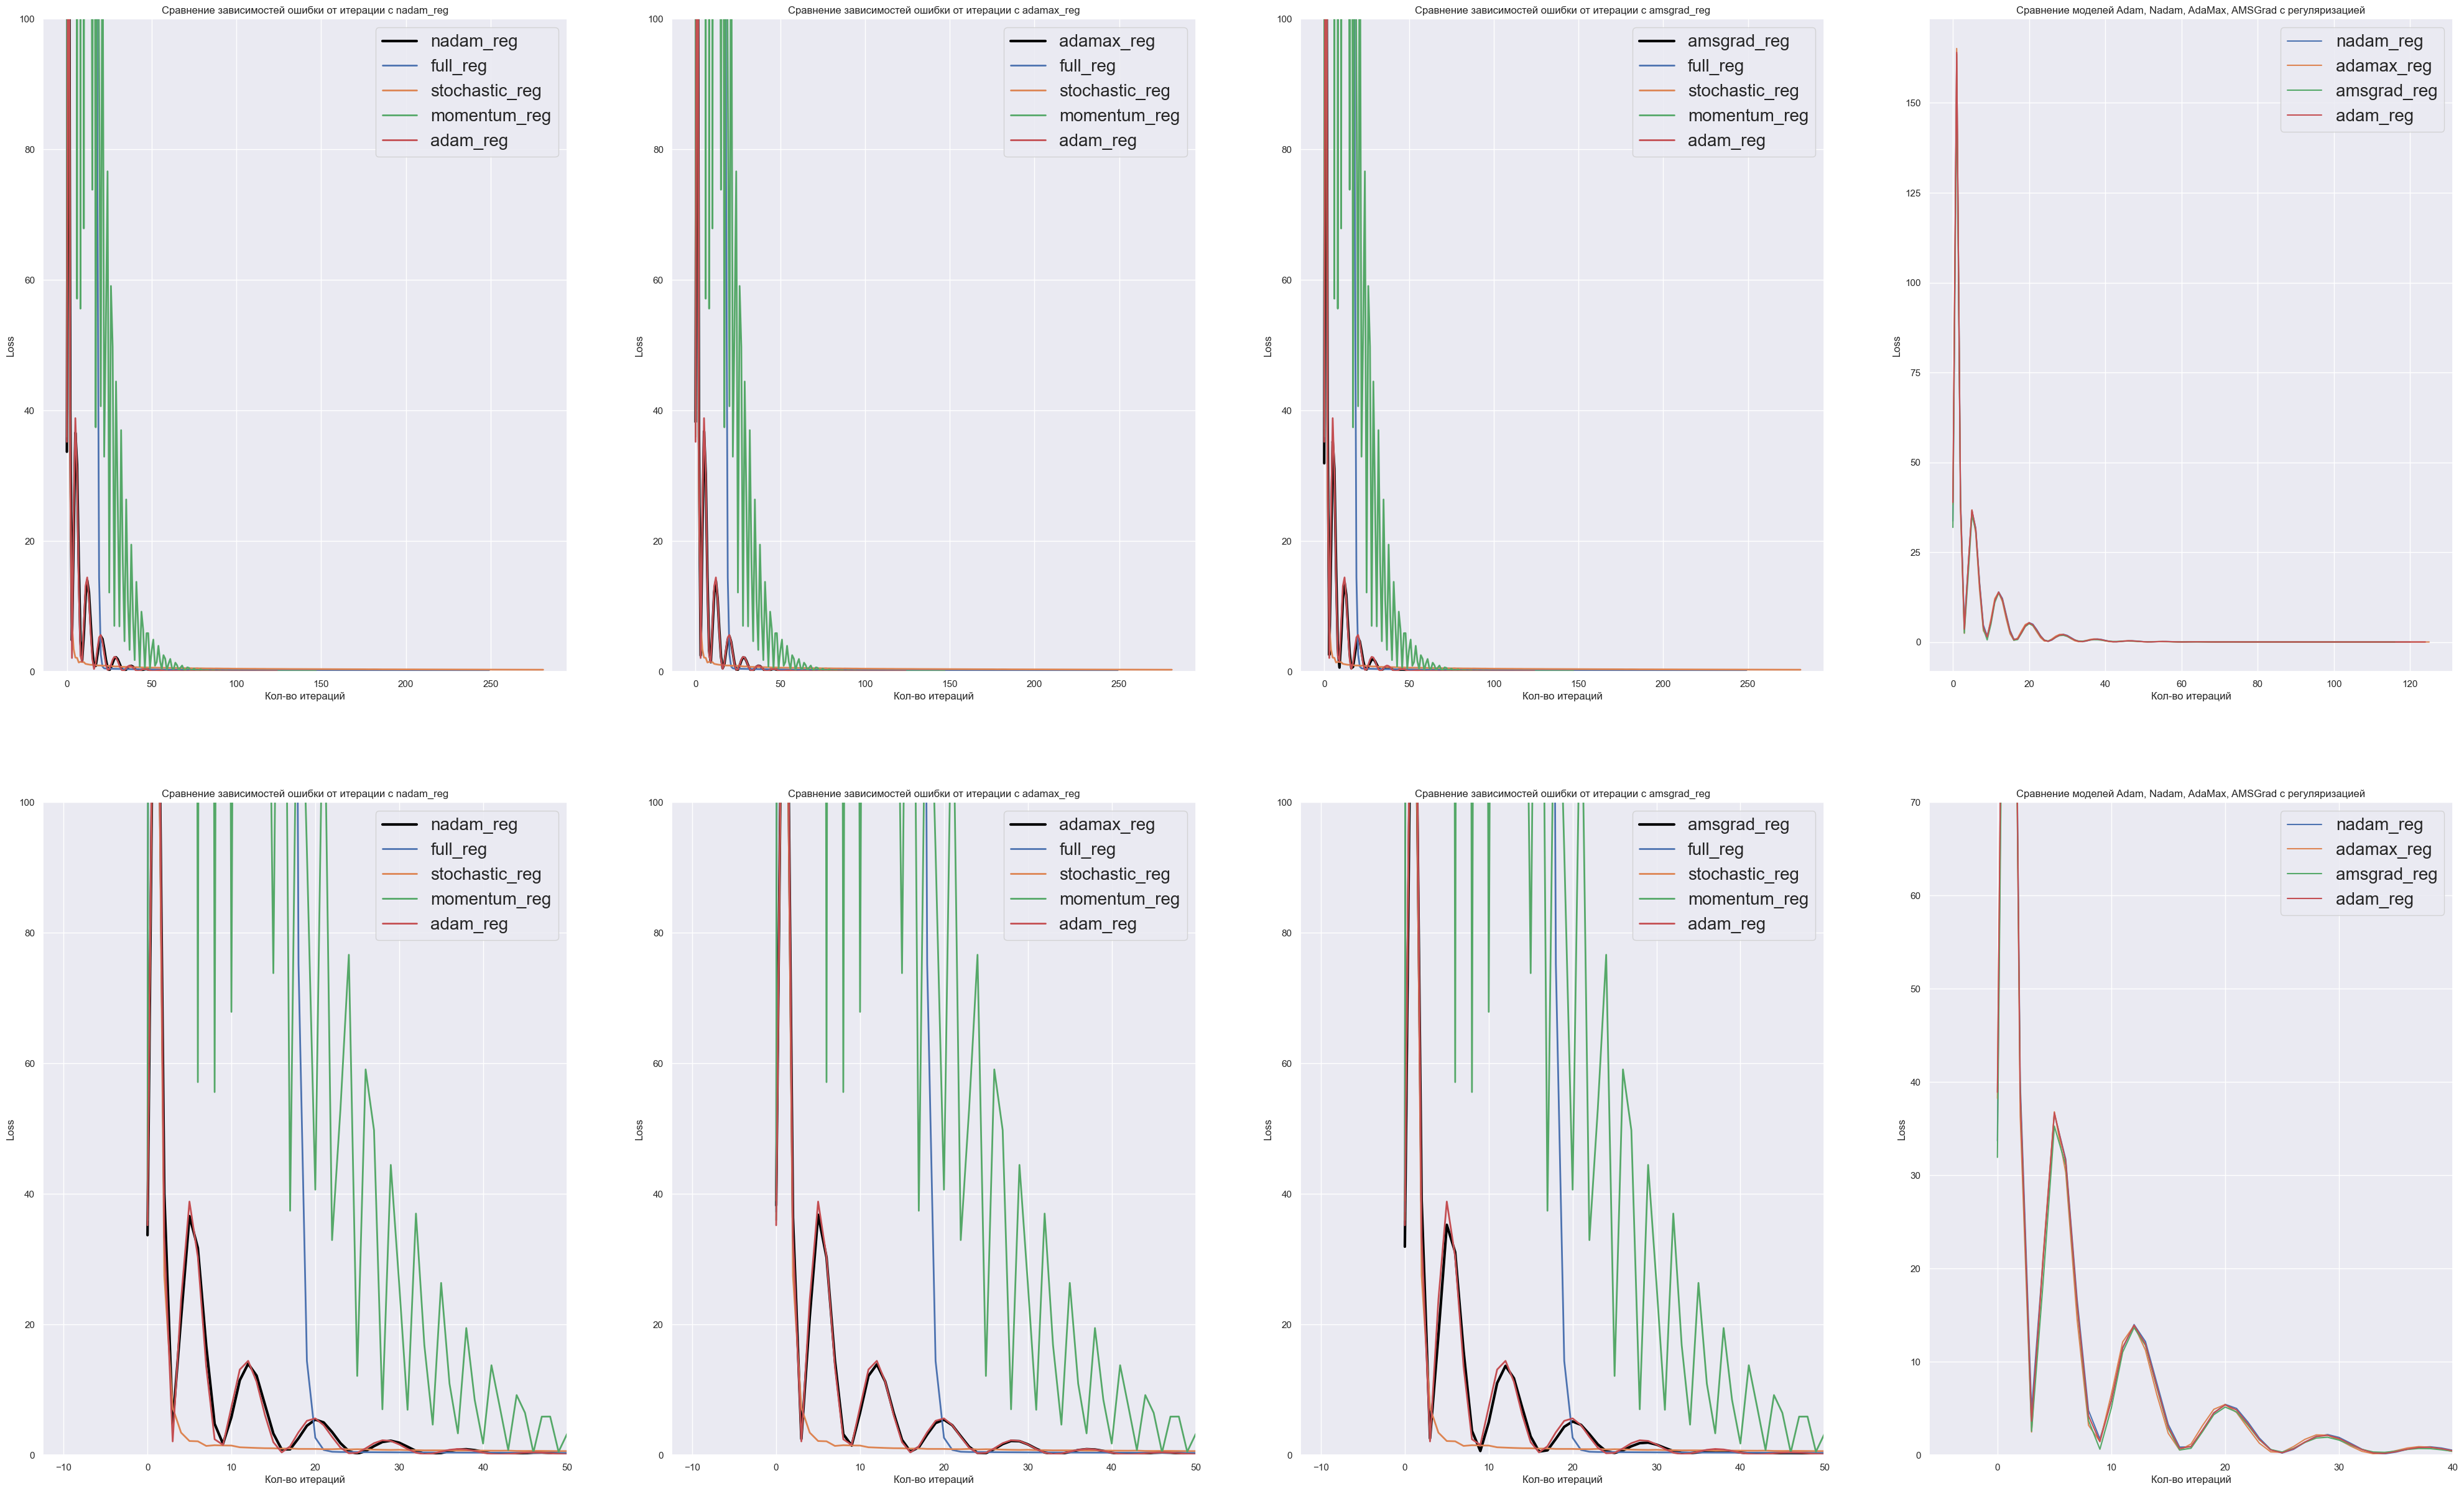

In [51]:
fig, ax = plt.subplots(2, 4, figsize=(50,30))
adams = ['nadam', 'adamax', 'amsgrad']


for k in range(3):

    ax[0][k].plot(data_for_graphs_adams_reg[adams[k]], label = f'{adams[k]}_reg', color='black', linewidth=3)
    ax[1][k].plot(data_for_graphs_adams_reg[adams[k]], label = f'{adams[k]}_reg', color='black', linewidth=3)

    for i in range(len(models[:4])):

        ax[0][k].plot(data_for_graphs_2[models[i]], label = f'{models[i]}_reg', linewidth=2)
        ax[0][k].legend(prop={'size': 20})
        ax[0][k].set_xlabel('Кол-во итераций')
        ax[0][k].set_ylabel('Loss')
        ax[0][k].set_title(f'Сравнение зависимостей ошибки от итерации с {adams[k]}_reg')
        ax[0][k].set_ylim(top=100, bottom=0)

        ax[1][k].plot(data_for_graphs_2[models[i]], label = f'{models[i]}_reg', linewidth=2)
        ax[1][k].legend(prop={'size': 20})
        ax[1][k].set_xlabel('Кол-во итераций')
        ax[1][k].set_ylabel('Loss')
        ax[1][k].set_title(f'Сравнение зависимостей ошибки от итерации с {adams[k]}_reg')

        ax[1][k].set_ylim(top=100, bottom=0)
        ax[1][k].set_xlim(right=50)

    ax[0][3].plot(data_for_graphs_adams_reg[adams[k]], label = f'{adams[k]}_reg')
    ax[0][3].legend(prop={'size': 20})
    ax[0][3].set_title('Сравнение моделей Adam, Nadam, AdaMax, AMSGrad с регуляризацией')
    ax[0][3].set_xlabel('Кол-во итераций')
    ax[0][3].set_ylabel('Loss')


    ax[1][3].plot(data_for_graphs_adams_reg[adams[k]], label = f'{adams[k]}_reg')
    ax[1][3].legend(prop={'size': 20})
    ax[1][3].set_ylim(top=70, bottom=0)
    ax[1][3].set_xlim(right=40)
    ax[1][3].set_title('Сравнение моделей Adam, Nadam, AdaMax, AMSGrad с регуляризацией')
    ax[1][3].set_xlabel('Кол-во итераций')
    ax[1][3].set_ylabel('Loss')

ax[0][3].plot(data_for_graphs_adams_reg['adam'], label = f'adam_reg')
ax[0][3].legend(prop={'size': 20});
ax[1][3].plot(data_for_graphs_adams_reg['adam'], label = f'adam_reg')
ax[1][3].legend(prop={'size': 20});

<center>

## Вариации Adam с минимизацией LogCosh

</center>

In [52]:
best_lambda_logcosh_2 = []

for model in ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'amsgrad']:

    opt_lambda = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:

        descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'loss_function': LossFunction.LogCosh,
                    'lambda_': lambd
                }
            }

        regression = LinearRegression(descent_config=descent_config)

        regression.fit(X_train_trns.values, y_train.values)

        loss = regression.calc_loss(X_val_trns.values, y_val.values)

        if loss < loss_best:

            opt_lambda = lambd
            loss_best = loss

    best_lambda_logcosh_2.append(opt_lambda)

    descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'loss_function': LossFunction.LogCosh,
                    'lambda_': opt_lambda
                }
            }

    regression = LinearRegression(descent_config=descent_config)

    regression.fit(X_train_trns.values, y_train.values)
    

    scnd_clmn = r2_score(y_train.values, regression.predict(X_train_trns.values))
    thrd_clmn = r2_score(y_test.values, regression.predict(X_test_trns.values))
    mse_train = regression.calc_loss(X_train_trns.values, y_train.values)
    mse_test = regression.calc_loss(X_test_trns.values, y_test.values)


    it = regression.iterat

    new_data = pd.DataFrame([[opt_lambda, mse_train, mse_test, scnd_clmn, thrd_clmn, it]], columns=['alpha', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)

full


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.043068  0.043713   0.776265  0.775021       173

stochastic


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.041702  0.042714   0.784231  0.780461       300

momentum


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.029662  0.030777    0.84863  0.843717       197

adam


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.028084  0.029116   0.857058  0.852382       148

nadam


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0  4.281332   0.028099  0.029129   0.856971  0.852371       108

adamax


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0   0.028081  0.029098   0.857046   0.85249       144

amsgrad


alpha  train_MSE  test_MSE  train_R^2  test_R^2 iteration
0   10.0    0.02806  0.029062   0.857191  0.852815       199

In [53]:
data_for_graphs_adams_log = dict()
models = ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'amsgrad']
    
for i in range(7):
    descent_config = {
                    'descent_name': models[i],
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'loss_function': LossFunction.LogCosh,
                        'lambda_': best_lambda_logcosh_2[i]
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_graphs_adams_log[models[i]] = losses

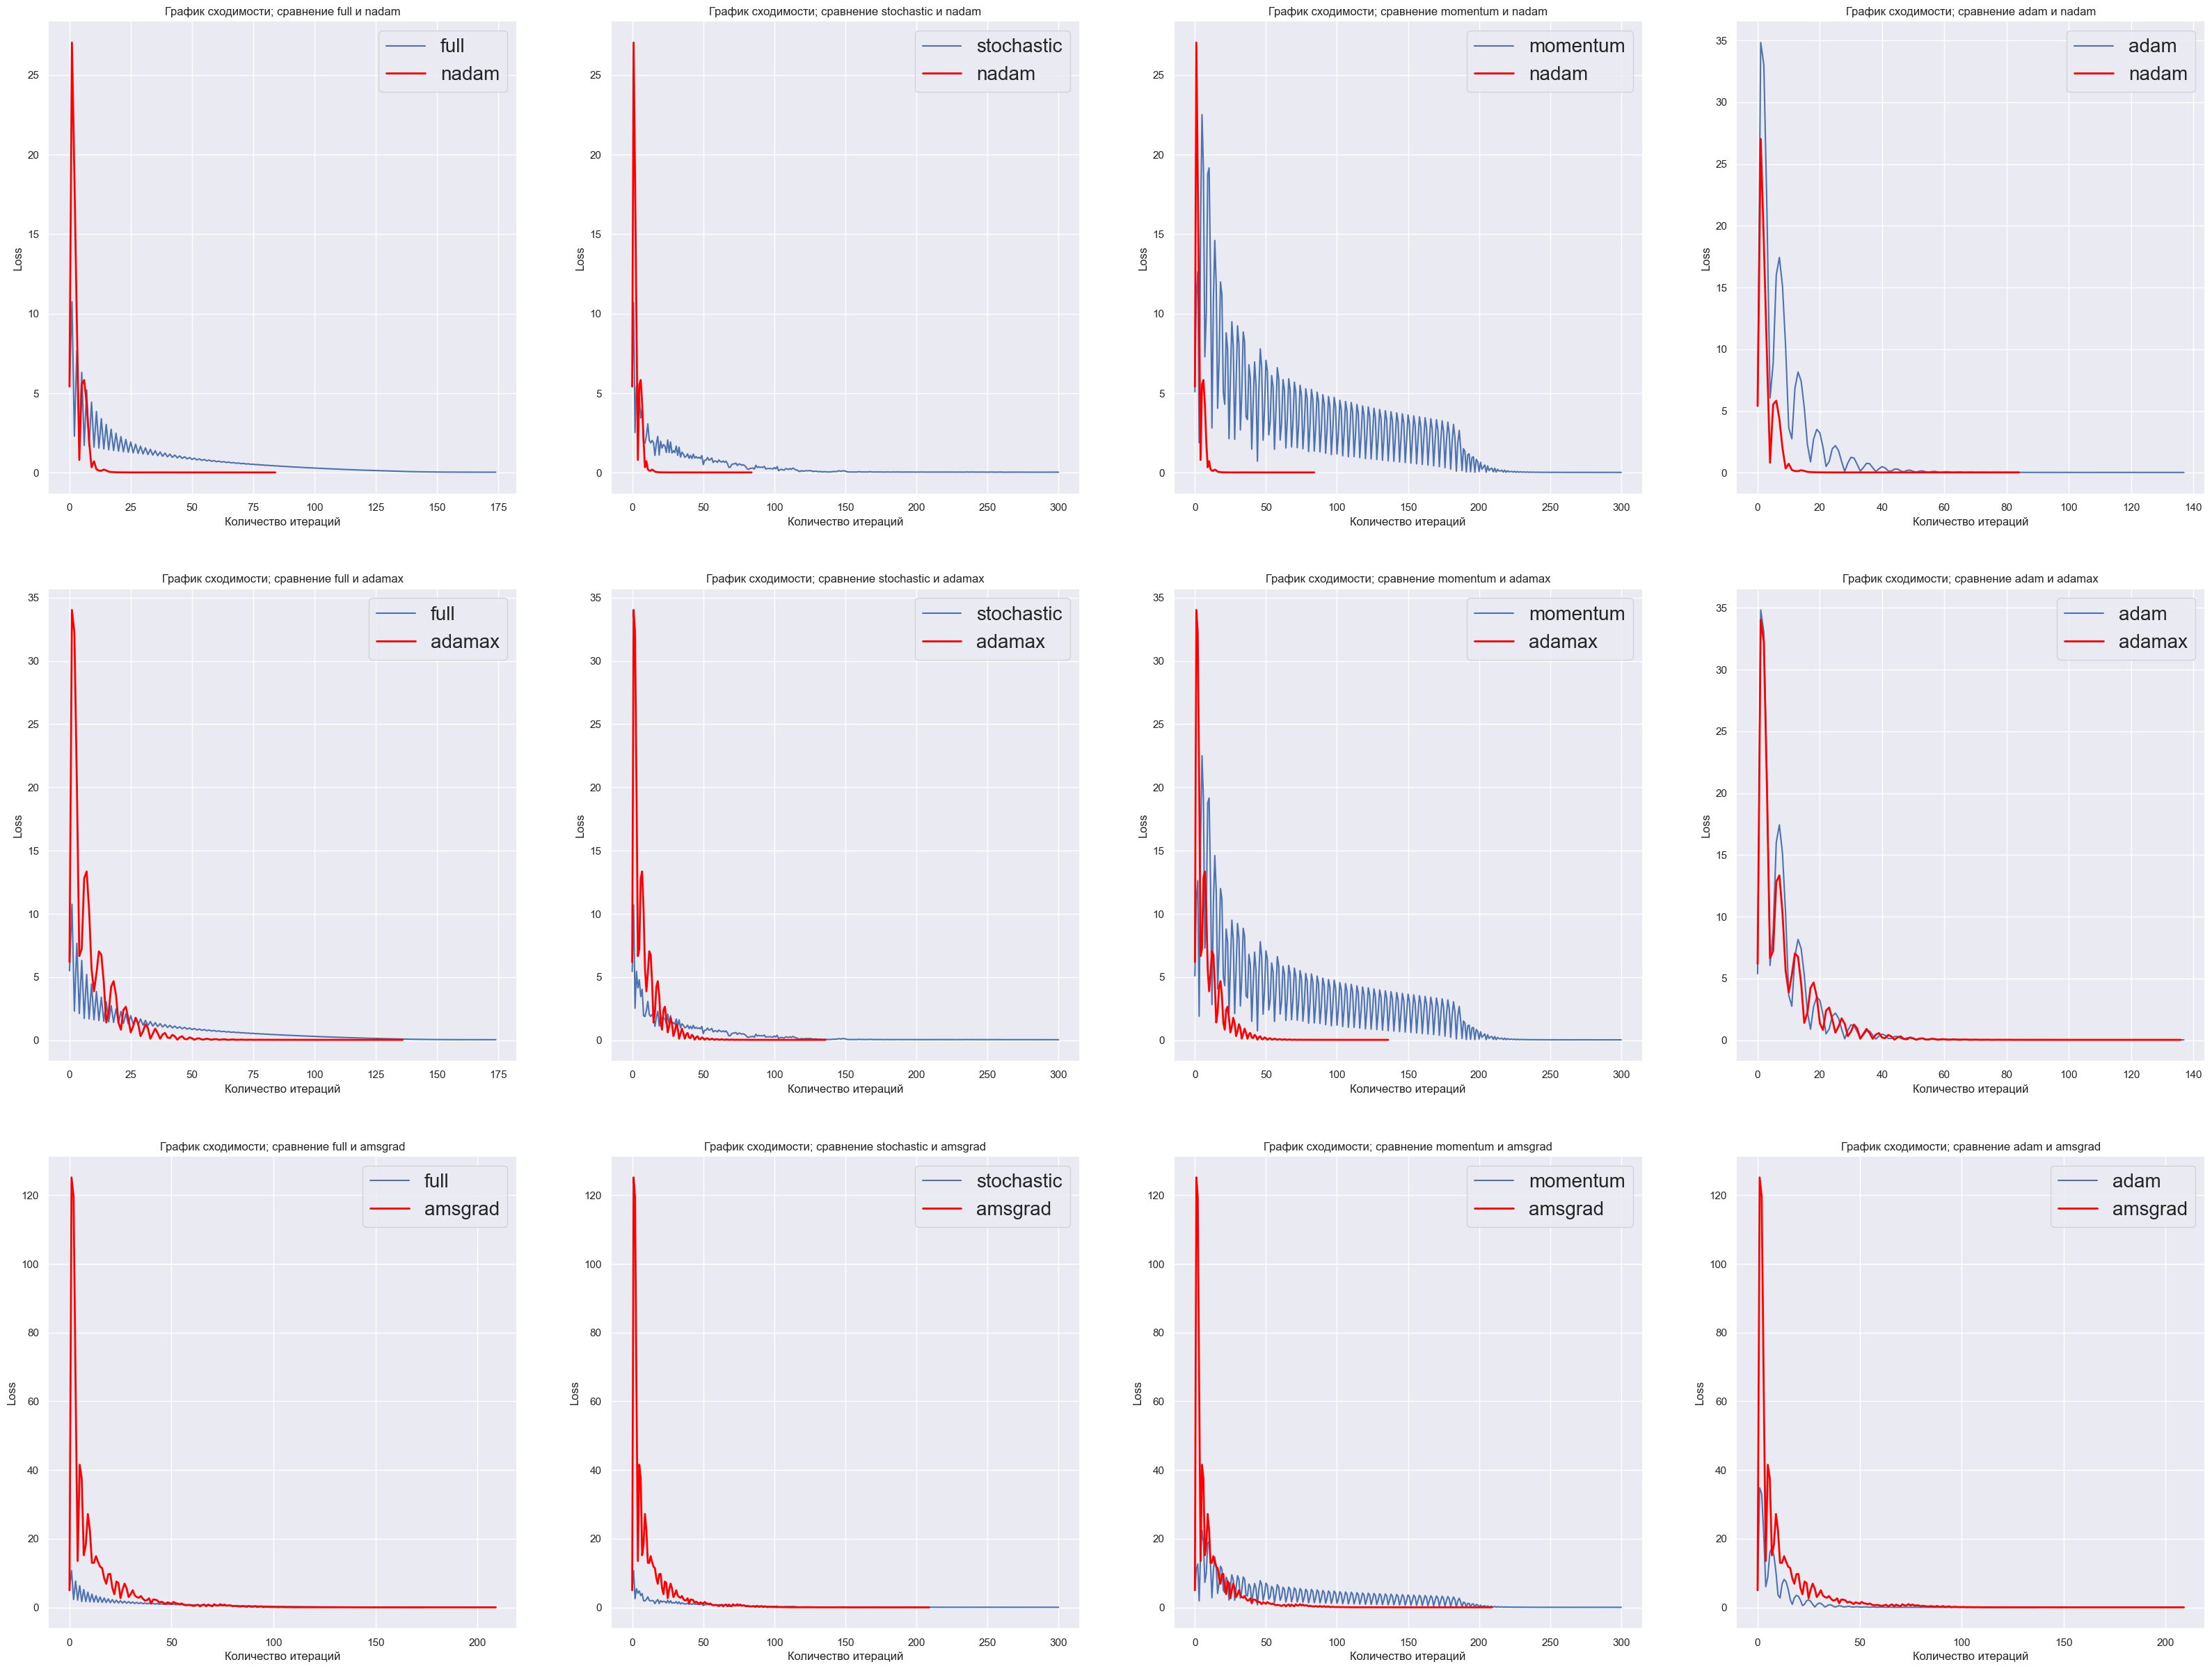

In [54]:
fig, ax = plt.subplots(3, 4, figsize=(40,30))

for i in range(3):
    
    for k in range(4):

        ax[i][k].plot(data_for_graphs_3[models[k]], label=models[k])
        ax[i][k].plot(data_for_graphs_adams_log[adams[i]], label=adams[i], linewidth=2, color='red')
        ax[i][k].legend(prop={'size': 20})
        ax[i][k].set_xlabel('Количество итераций')
        ax[i][k].set_ylabel('Loss')
        ax[i][k].set_title(f'График сходимости; сравнение {models[k]} и {adams[i]}')


## <div style='color:red'> Вывод: </div>

- ## _**Минимизация MSE**_

    - ### <code>Nadam</code>

        #### На основе получившихся метрик <code>Nadam</code> показал достаточно хороший результат, но не самый лучший. Однако его преимуществом оказалось, что он быстрее всех остальных методов оказался в окрестности минимума функции и при этом для этого ему не потребовалось большое количество итераций 

    - ### <code> Adamax </code>

        #### <code>Adamax</code> показал наихудший результат среди всех вариаций <code> Adam</code>. Мметрики получились чуть лучше обычного градиентного спуска, но при этом ему и потребовалось большее количество итераций до сходимости, что делает использование <code>Adamax</code> иррациональным для этой задачи. Однако исходя из графиков он показал меньшие колебания в сходимости относительно <code> Adam</code>, но это не является показателем

    - ### <code> Amsgrad </code>

        #### <code> Amsgrad </code> показал наилучший результат среди всех рассматриваемых методов. $ R^2 $ и $ MSE $ получились действительно достойными и не может не радовать количество итераций, которое заняло у <code>Amsgrad</code>. Для сравнения, у <code>Nadam</code> $ R^2 $ получился приблизительно 0.85, но при этом для этого и потребовалось на 25 итераций больше

    - ### Итог

        #### Как было сказано ранее, <code> Amsgrad </code> является наилучшим методом, поскольку добился наилучших метрик и занял достаточно небольшое количество итераций 
         
- ## _**Минимизация MSE с регуляризацией**_

    - ### <code>Nadam</code>
    
        #### После применения регуляризации метрики незначительно улучшились и при этом уменьшилось количество итераций до сходимости. В этом случае стоит утверждать, что регуляризация пошла <code>Nadam</code> на пользу

    - ### <code> Adamax </code>

        #### Регуляризация очень сильно повлияла на <code>Adamax</code>. Теперь он показал наилучший результат среди остальных моделей (напомню, что при минимизации $ MSE $ без регуляризации <code>Adamax</code> показал такой же результат, как и при применении обычного градиентного спуска). Стоит также отметить, что значительно уменьшилось количество итераций до сходимости 

    - ### <code> Amsgrad </code>

        #### Применение регуляризации практически никак не повлияло на результаты <code> Adamax</code>. Метрики незначительно улучшились, но при этом количество итераций до сходимости увеличилось

    - ### Итог

        #### В результате применения регуляризации метрики действительно улучшились, в большинстве случаев уменьшилось и количество итераций до сходимости. Также исходя из графиков можно сделать вывод, что регуляризация практически уравняла все вариации <code> Adam </code> (в том числе и сам <code> Adam </code>), поэтому если модель переобучается и следует применить регуляризацию, то без разницы какой из <code> Adam</code>'ов применять 

- ## _**Минимизация LogCosh**_

    - ### <code>Nadam</code>

        #### Минимизация <code> LogCosh </code> оказалась наилучшим способом для улучшения метрик, поскольку $ R^2 $ стал действительно больше и при этом заняло наименьшее количество итераций в сравнении с другими рассмотренными методами. Если же сравнивать <code>Nadam</code> с остальными методами, то он быстрее всех оказывается в окрестности минимума и при этом ему требуется меньшее количество итераций

    - ### <code> Adamax </code>

        #### После минимазции <code> LogCosh </code> показал такой же результат, как и <code> Nadam </code>, но при этом ему и потребовалось большее количество итераций для достижения полученных метрик. На графике также можно заметить, что <code> Adamax </code> и <code> Adam </code> имеют схожу динамику сходимости к минимуму 

    - ### <code> Amsgrad </code>

        #### Можно сказать, что минимизация </code> LogCosh </code> негативно повлияло на <code> Amsgrad </code>, потому что количество итераций стало достаточно большим, но это не привело к значительному улучшению метрик. К такому же выводу можно прийти основываясь на графики, <code> Amsgrad </code> медленнее всех сходится к минимуму

    - ### Итог

        #### Использование <code> LogCosh </code> пошло на пользу для большинства моделей, поскольку <code>LogCosh</code> имеет более сложную структуру, что в целом позволило улучшить метрики для всех моделей

- ## _**Результаты**_

#### После использования нескольких вариаций <code> Adam </code>, двух функционалов ошибок, регуляризации мы достигли наилучших результатов для максимизации $ R^2 $. 

### <div style='color:green'> Наилучший метод: </div> <code>Amsgrad</code> с использованием <code>LogCosh</code>,  $ \; R^2 $: 0.852815

    


### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

<center>

## MAE

</center>

#### $$ L = |Xw - y| $$

#### $$  \nabla_w L = \begin{cases} X_i, \; (X_i w - y_i)> 0 \\ -X_i, \; (X_i w - y_i) < 0 \\ 0, \; (X_i w - y_i) = 0 \end{cases} $$

>#### $$ \nabla_w Q = \frac{1}{l} \begin{cases} X_i, \; (X_i w - y_i)> 0 \\ -X_i, \; (X_i w - y_i) < 0 \\ 0, \; (X_i w - y_i) = 0 \end{cases} $$

<br>

<center>

## Huber-Loss

</center>

#### $$ L = \begin{cases} \frac{1}{2}(y_i - X_i w)^2, \; |y - X_i w| < \delta \\ \delta(|y_i - X_i w| - \frac{1}{2} \delta), \; |y_i - X_i w | \geqslant \delta \end{cases} $$

#### $$ \nabla_w L = \begin{cases} y_i - X_i w, \; |y_i - X_i w| < \delta \\ \delta \; sign(y_i - X_i w), \; |y_i - X_i w| \geqslant \delta \end{cases} $$

>#### $$ \nabla_w Q = -\frac{1}{l} \begin{cases} y_i - X_i w, \; |y_i - X_i w| < \delta \\ \delta \; sign(y_i - X_i w), \; |y_i - X_i w| \geqslant \delta \end{cases} $$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

<center>

## MAE

</center>



In [55]:
from descents import BaseDescent, LossFunction

best_lambda_mae = []

for model in ['full', 'stochastic', 'momentum', 'adam']:

    opt_lambda = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'train_MAE', 'test_MAE', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:

        descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'loss_function': LossFunction.MAE,
                    'lambda_': lambd
                }
            }

        regression = LinearRegression(descent_config=descent_config)

        regression.fit(X_train_trns.values, y_train.values)
        y_pred = regression.predict(X_val_trns.values)

        loss = regression.calc_loss(X_val_trns.values, y_val.values)

        if loss < loss_best:

            opt_lambda = lambd
            loss_best = loss

    best_lambda_mae.append(opt_lambda)

    descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'loss_function': LossFunction.MAE,
                    'lambda_': opt_lambda
                }
            }

    regression = LinearRegression(descent_config=descent_config)

    regression.fit(X_train_trns.values, y_train.values)
    

    scnd_clmn = r2_score(y_train.values, regression.predict(X_train_trns.values))
    thrd_clmn = r2_score(y_test.values, regression.predict(X_test_trns.values))
    mae_train = regression.calc_loss(X_train_trns.values, y_train.values)
    mae_test = regression.calc_loss(X_test_trns.values, y_test.values)
    mse_train = BaseDescent(dimension = X_train_trns.shape[1], loss_function = LossFunction.MSE).calc_loss(X_train_trns.values, y_train.values)
    mse_test = BaseDescent(dimension = X_test_trns.shape[1], loss_function = LossFunction.MSE).calc_loss(X_test_trns.values, y_test.values)
    it = regression.iterat

    new_data = pd.DataFrame([[opt_lambda, mae_train, mae_test, mse_train, mse_test, scnd_clmn, thrd_clmn, it]], columns=['alpha', 'train_MAE', 'test_MAE', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)

full


alpha  train_MAE  test_MAE  train_MSE   test_MSE  train_R^2  test_R^2  \
0  4.281332   0.251101   0.25354  38.759255  36.133604   0.748034  0.742144   

  iteration  
0       300

stochastic


alpha  train_MAE  test_MAE  train_MSE   test_MSE  train_R^2  test_R^2  \
0  1.832981   0.231862  0.235772  39.531167  25.927085   0.741049  0.730797   

  iteration  
0       300

momentum


alpha  train_MAE  test_MAE  train_MSE   test_MSE  train_R^2  test_R^2  \
0  4.281332   0.778413  0.775911  45.860419  34.600156  -0.653597 -0.631485   

  iteration  
0       300

adam


alpha  train_MAE  test_MAE  train_MSE   test_MSE  train_R^2  test_R^2  \
0  1.832981   0.179948  0.182224  28.830586  32.707533   0.855007  0.850446   

  iteration  
0       300

In [56]:
data_for_graphs_mae = dict()
models = ['full', 'stochastic', 'momentum', 'adam']
    
for i in range(4):
    descent_config = {
                    'descent_name': models[i],
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'loss_function': LossFunction.MAE,
                        'lambda_': best_lambda_mae[i]
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_graphs_mae[models[i]] = losses

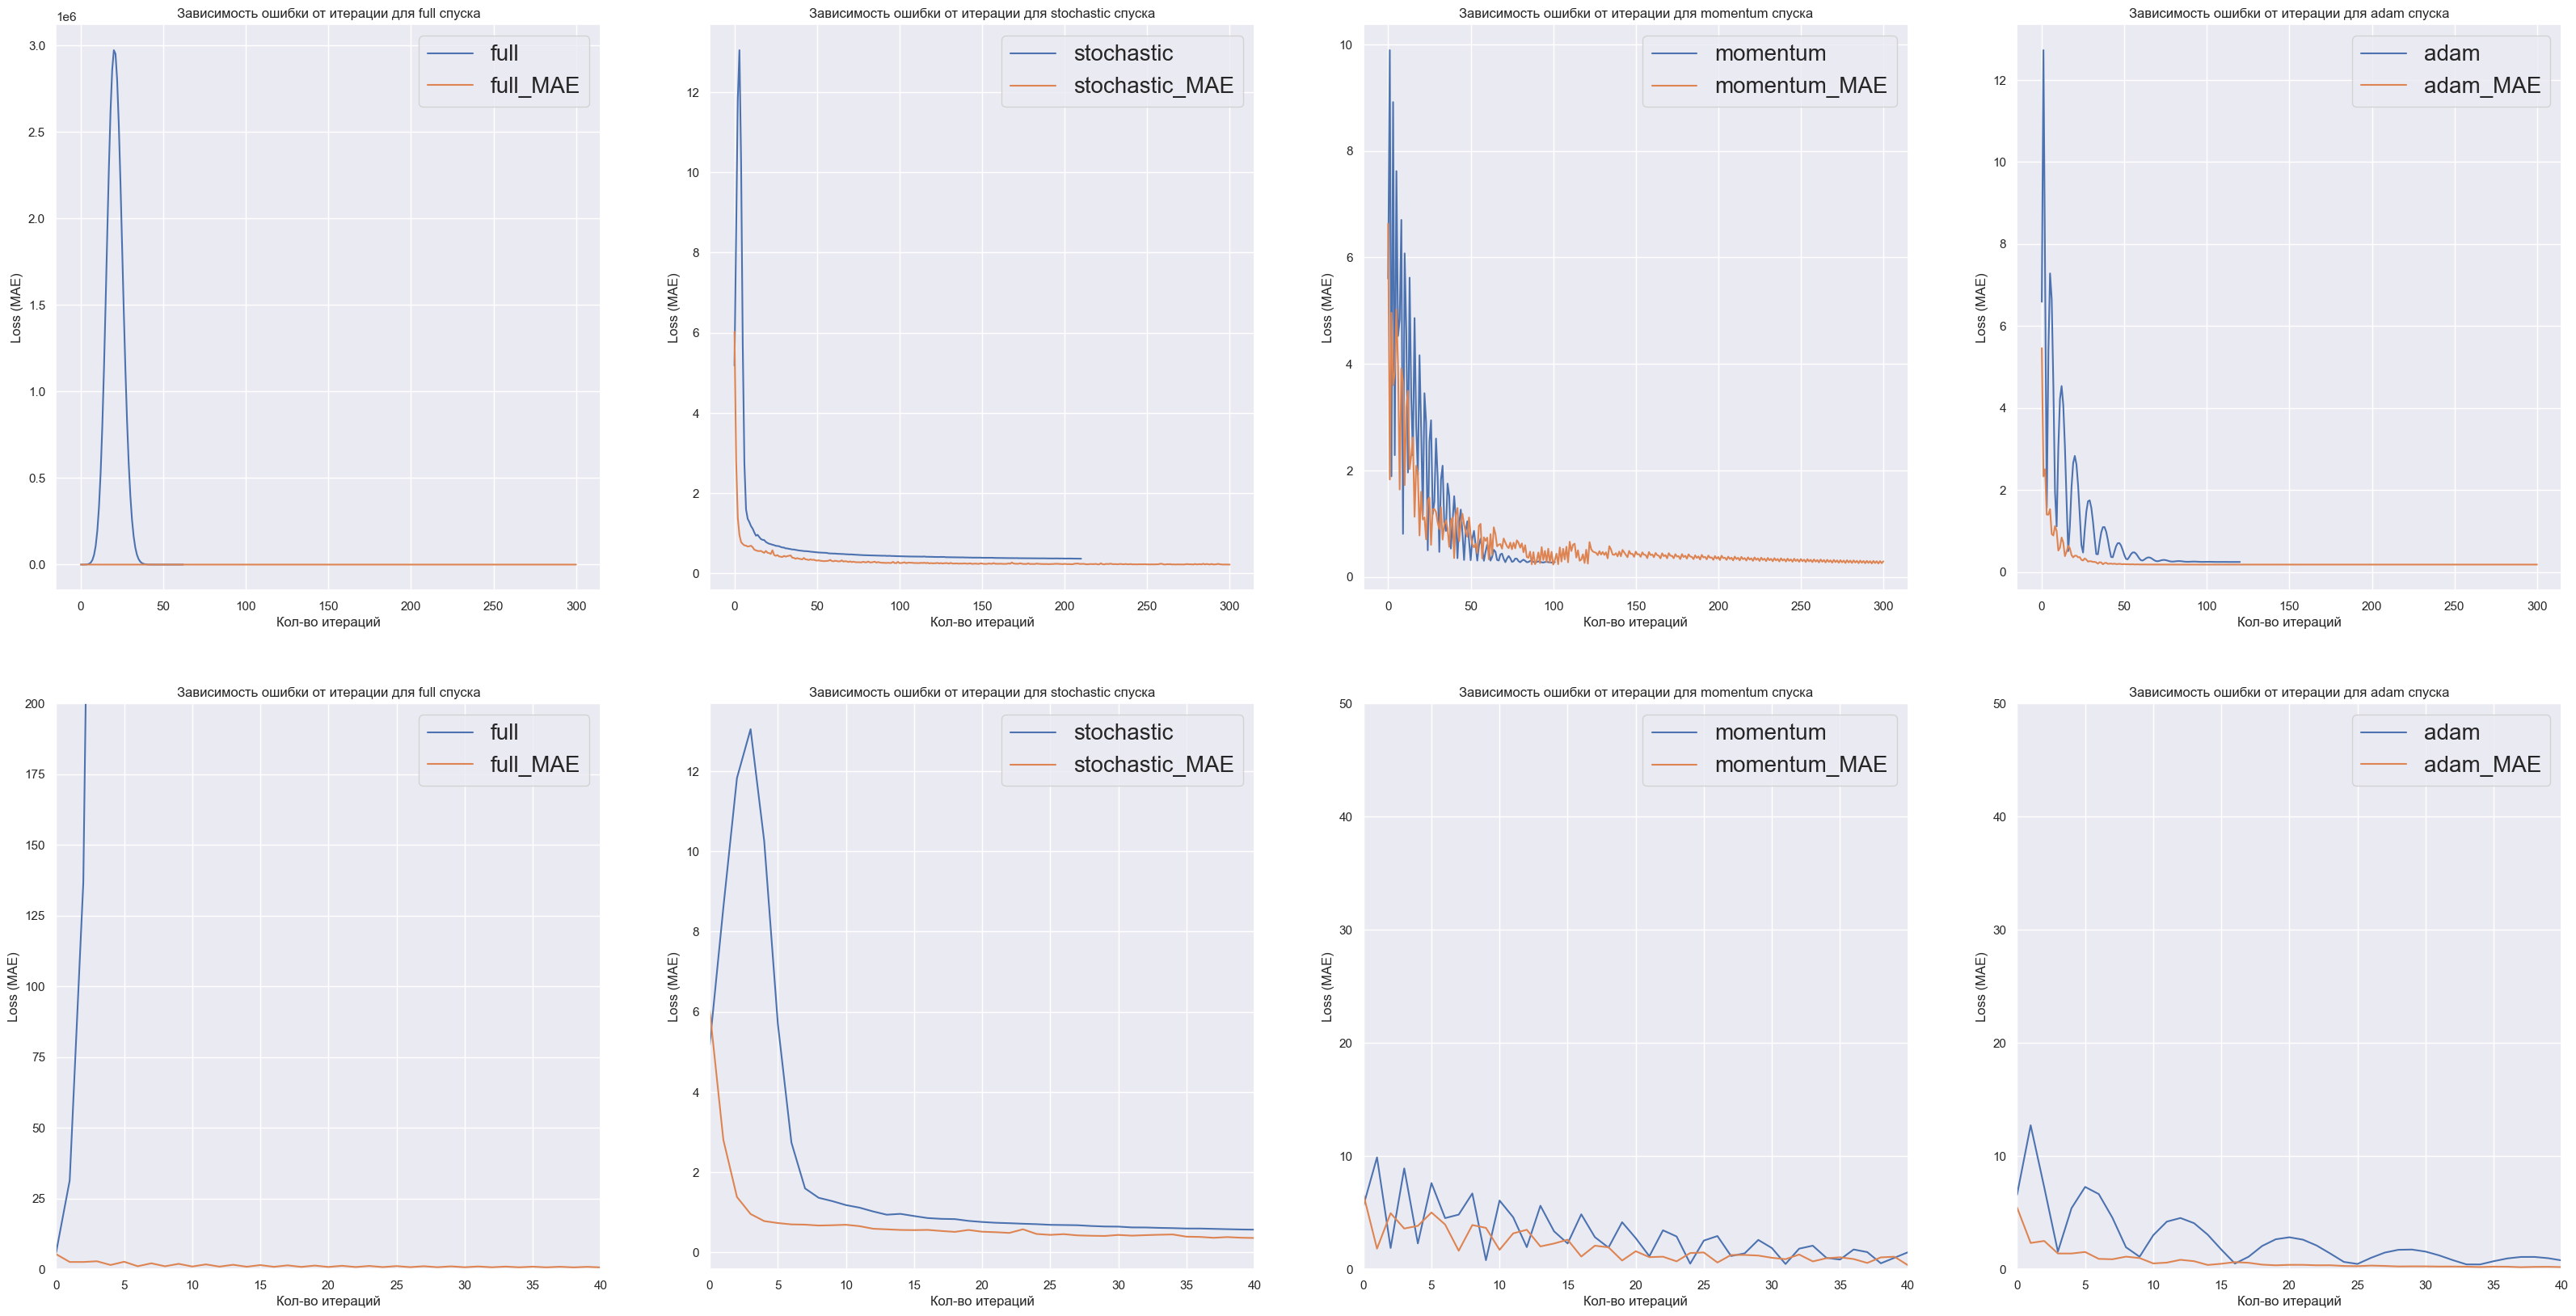

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(40,20))


### Для графиков я заменю MSE на RMSE, чтобы привести к одним единицам измерения 

for i in range(len(models)):

    ax[0][i].plot(np.sqrt(data_for_graphs[models[i]]), label = models[i])
    ax[0][i].plot(data_for_graphs_mae[models[i]], label = f'{models[i]}_MAE')

    ax[0][i].legend(prop={'size': 20})
    ax[0][i].set_xlabel('Кол-во итераций')
    ax[0][i].set_ylabel('Loss (MAE)')
    ax[0][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска')

    ax[1][i].set_xlim(right=40)

    if models[i] == 'momentum' or models[i] == 'adam':
        ax[1][i].set_ylim(top=50)

    if models[i] == 'full':
        ax[1][i].set_ylim(top=200)

    ax[1][i].plot(np.sqrt(data_for_graphs[models[i]]), label = models[i])
    ax[1][i].plot(data_for_graphs_mae[models[i]], label = f'{models[i]}_MAE')

    ax[1][i].legend(loc='upper right', prop={'size': 20})
    ax[1][i].set_xlabel('Кол-во итераций')
    ax[1][i].set_ylabel('Loss (MAE)')
    ax[1][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска')

## **Метрики, полученные в моделях градиентного спуска без регуляризации, минимизирующих MSE:**

- #### **full**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 1.832981| 0.114888 | 0.118122 | 0.720747 | 0.715519 | 69 |


</center>

- #### **stochastic**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 0.615848 | 0.163368 | 0.170969 | 0.602909 | 0.588245 | 134 |


</center>

- #### **momentum**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 0.615848 | 0.079381 | 0.081629 | 0.807053 | 0.803407 | 98 |


</center>

- #### **adam**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 1.832981 | 0.059873 | 0.062692 | 0.854469 | 0.849015 | 138 |


</center>

## <div style='color:red'>Вывод: </div>

#### Анализируя результаты минимизации $ MSE $ и $ MAE $, то ответ на вопрос какой из методов лучше неоднозначен. Улучшение произошло у <code>full, stochastic, adam</code>. Это может быть связано с тем, что большие ошибки имеют меньший вес при использовании $ MAE $, чем при $ MSE $, поэтому это наиболее вероятная причина улучшения $ R^2 $. Значительно ухудшилось $ R^2 $ у <code>momentum</code>, потому что у MAE будут одинаковые значения у градиента, которые не будут изменяться в окрестности минимума, поэтому <code>momentum</code> будет перескакивать через глобальный минимум

<center>

## Huber

</center>

In [58]:
from descents import BaseDescent, LossFunction


deltas = np.logspace(-5, 1, 10)


best_lambda_huber = []
best_delta = []

for model in ['full', 'stochastic', 'momentum', 'adam']:

    opt_lambda = None
    opt_delta = None
    loss_best = np.inf

    dataframe = pd.DataFrame(columns=['alpha', 'delta', 'train_Huber', 'test_Huber', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    for lambd in lambdas:
        for delt in deltas:

            descent_config = {
                    'descent_name': model,
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'loss_function': LossFunction.Huber,
                        'lambda_': lambd,
                        'delta': delt
                    }
                }

            regression = LinearRegression(descent_config=descent_config)

            regression.fit(X_train_trns.values, y_train.values)

            loss = regression.calc_loss(X_val_trns.values, y_val.values)

            if loss < loss_best:

                opt_lambda = lambd
                loss_best = loss
                opt_delta = delt
                
    best_delta.append(opt_delta)
    best_lambda_huber.append(opt_lambda)

    descent_config = {
                'descent_name': model,
                'kwargs': {
                    'dimension': X_train_trns.shape[1],
                    'loss_function': LossFunction.Huber,
                    'lambda_': opt_lambda,
                    'delta': opt_delta
                }
            }

    regression = LinearRegression(descent_config=descent_config)

    regression.fit(X_train_trns.values, y_train.values)
    

    scnd_clmn = r2_score(y_train.values, regression.predict(X_train_trns.values))
    thrd_clmn = r2_score(y_test.values, regression.predict(X_test_trns.values))
    huber_train = regression.calc_loss(X_train_trns.values, y_train.values)
    huber_test = regression.calc_loss(X_test_trns.values, y_test.values)
    mse_train = BaseDescent(dimension = X_train_trns.shape[1], loss_function = LossFunction.MSE).calc_loss(X_train_trns.values, y_train.values)
    mse_test = BaseDescent(dimension = X_test_trns.shape[1], loss_function = LossFunction.MSE).calc_loss(X_test_trns.values, y_test.values)
    it = regression.iterat

    new_data = pd.DataFrame([[opt_lambda, opt_delta, huber_train, huber_test, mse_train, mse_test, scnd_clmn, thrd_clmn, it]], columns=['alpha', 'delta', 'train_Huber', 'test_Huber', 'train_MSE', 'test_MSE', 'train_R^2', 'test_R^2','iteration'])

    dataframe = pd.concat([dataframe, new_data], axis=0)

    print(model)
    display(dataframe)

full


alpha  delta  train_Huber  test_Huber  train_MSE   test_MSE  train_R^2  \
0   10.0    0.1    -0.006665   -0.006451  38.639615  41.052185   0.520205   

   test_R^2 iteration  
0   0.51239       136

stochastic


alpha  delta  train_Huber  test_Huber  train_MSE   test_MSE  train_R^2  \
0   10.0    0.1    -0.009986   -0.009556  39.424408  31.865243   0.645858   

   test_R^2 iteration  
0  0.637561       300

momentum


alpha  delta  train_Huber  test_Huber  train_MSE   test_MSE  train_R^2  \
0   10.0    0.1    -0.013765   -0.013689  38.679319  36.761554   0.826956   

   test_R^2 iteration  
0  0.821877       157

adam


alpha  delta  train_Huber  test_Huber  train_MSE   test_MSE  train_R^2  \
0  0.143845    0.1    -0.014108   -0.014092  48.426397  45.430402   0.842395   

   test_R^2 iteration  
0  0.836515       300

In [59]:
data_for_graphs_huber = dict()
models = ['full', 'stochastic', 'momentum', 'adam']
    
for i in range(4):
    descent_config = {
                    'descent_name': models[i],
                    'kwargs': {
                        'dimension': X_train_trns.shape[1],
                        'loss_function': LossFunction.Huber,
                        'lambda_': best_lambda_huber[i],
                        'delta': best_delta[i]
                        
                    }
                }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train_trns.values, y_train.values)
    losses = regression.loss_history
    
    data_for_graphs_huber[models[i]] = losses

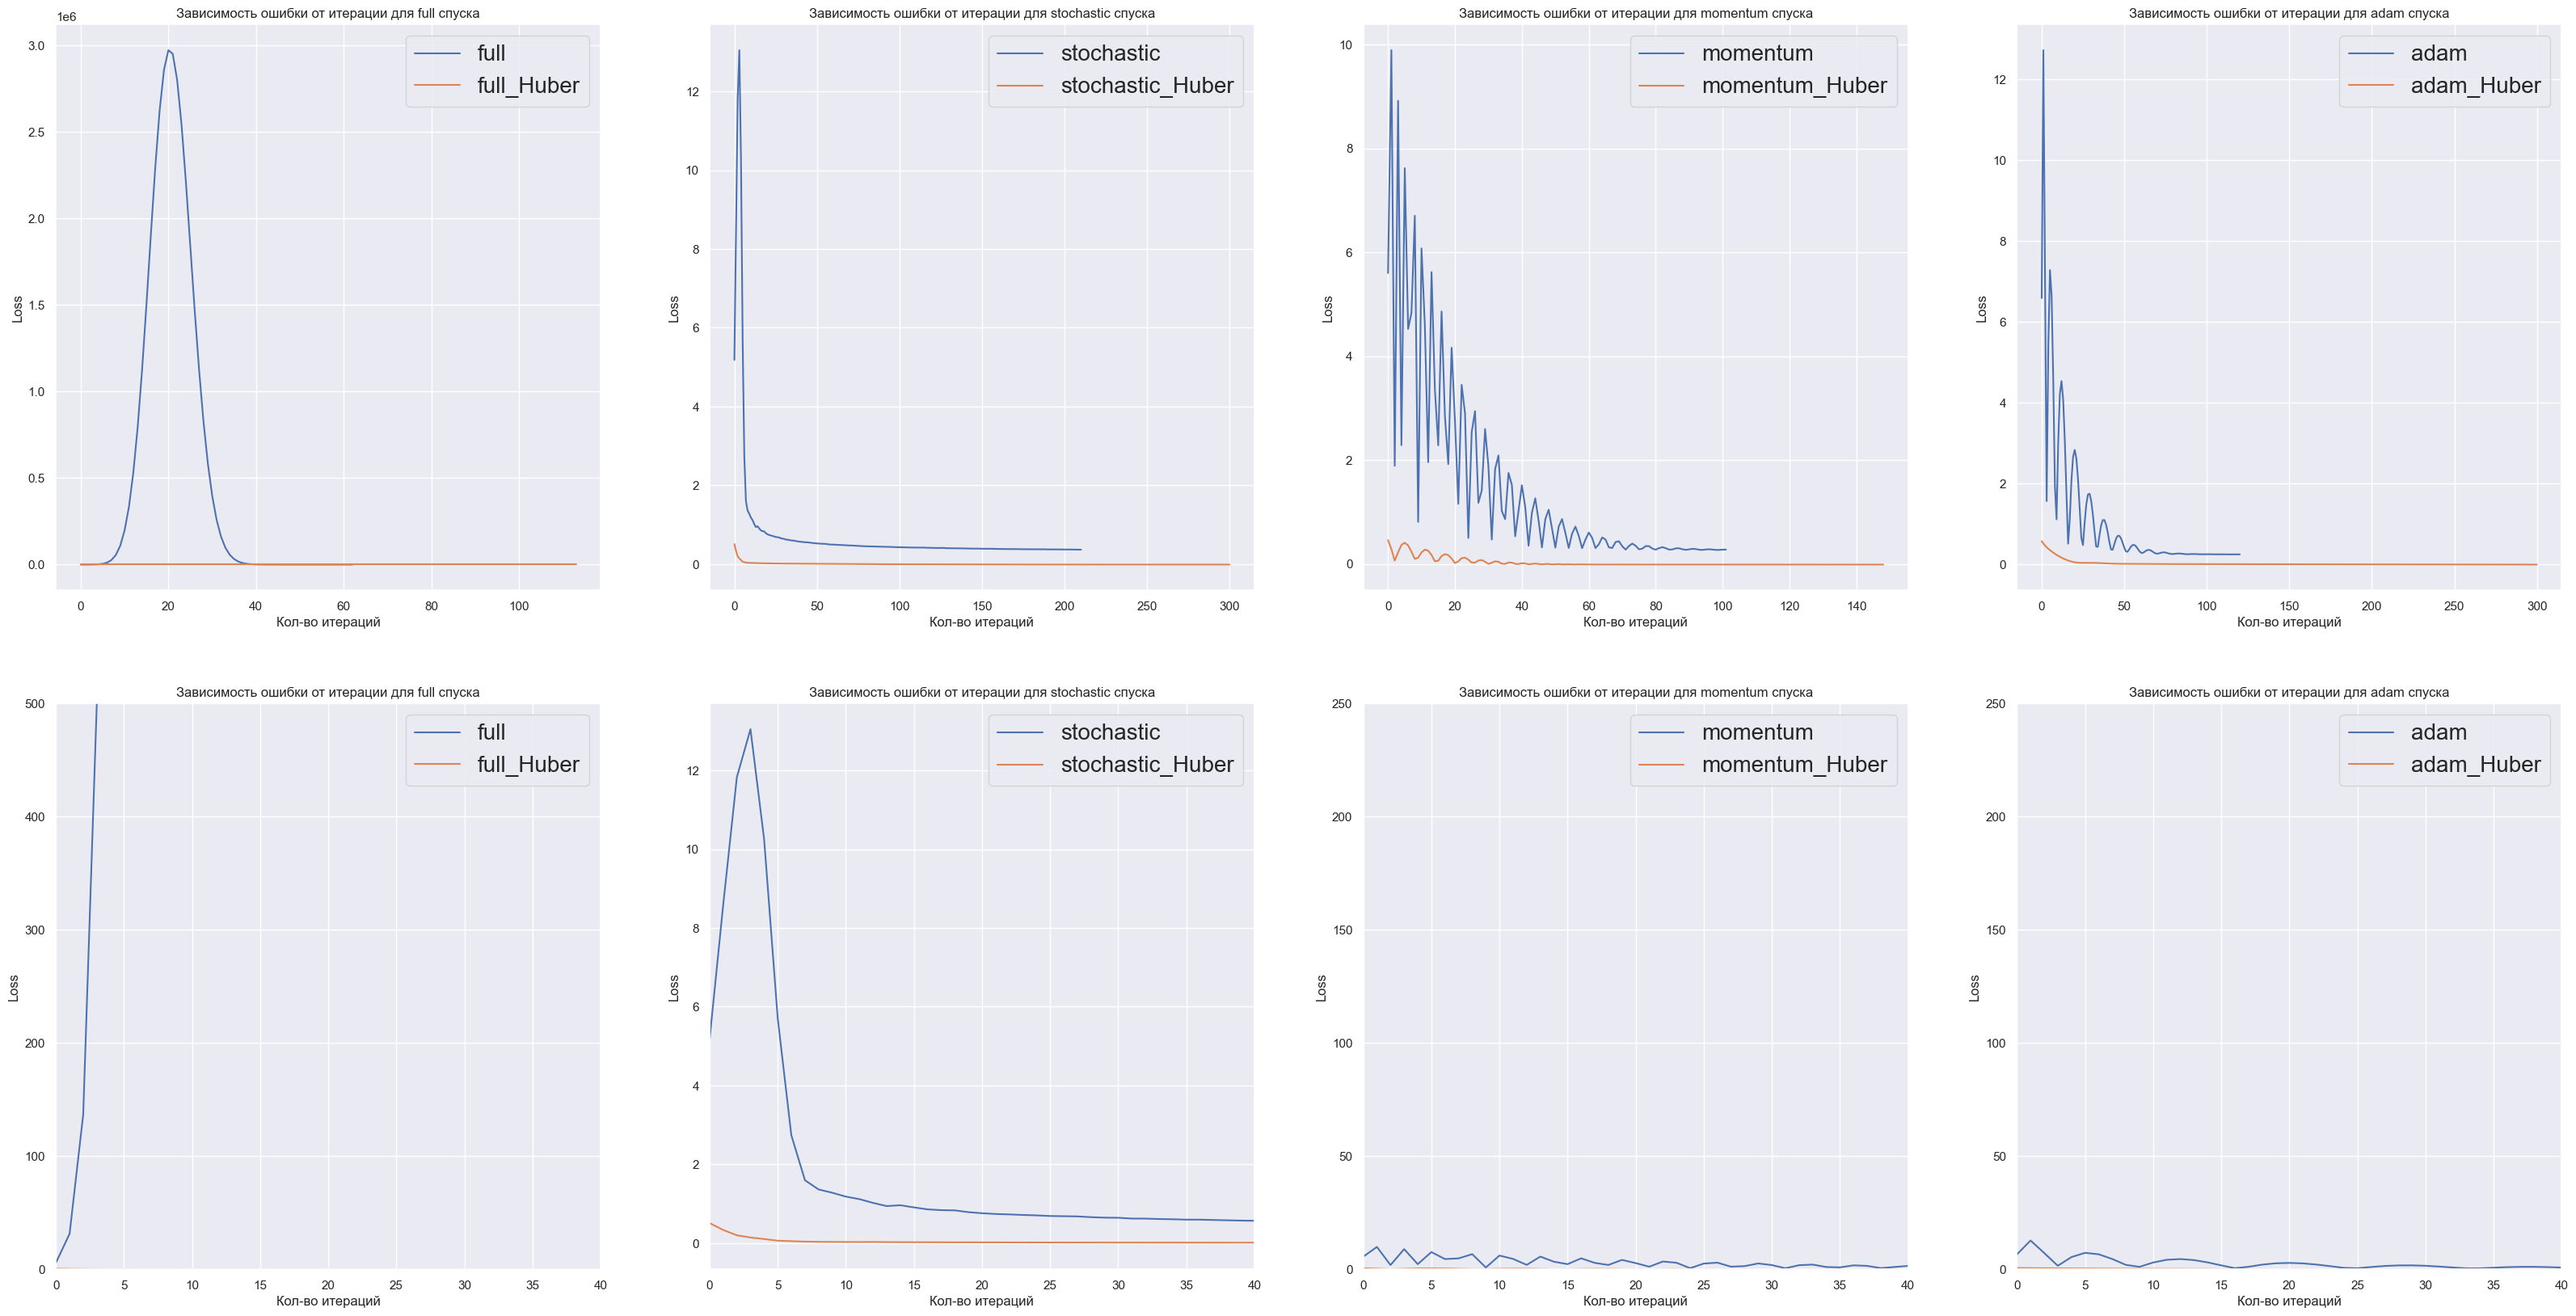

In [60]:
fig, ax = plt.subplots(2, 4, figsize=(40,20))

### Для графиков я заменю MSE на RMSE, чтобы привести к одним единицам измерения 


for i in range(len(models)):

    ax[0][i].plot(np.sqrt(data_for_graphs[models[i]]), label = models[i])
    ax[0][i].plot(data_for_graphs_huber[models[i]], label = f'{models[i]}_Huber')

    ax[0][i].legend(prop={'size': 20})
    ax[0][i].set_xlabel('Кол-во итераций')
    ax[0][i].set_ylabel('Loss')
    ax[0][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска')

    ax[1][i].set_xlim(right=40)

    if models[i] == 'momentum' or models[i] == 'adam':
        ax[1][i].set_ylim(top=250)

    if models[i] == 'full':
        ax[1][i].set_ylim(top=500)

    ax[1][i].plot(np.sqrt(data_for_graphs[models[i]]), label = models[i])
    ax[1][i].plot(data_for_graphs_huber[models[i]], label = f'{models[i]}_Huber')

    ax[1][i].legend(loc='upper right', prop={'size': 20})
    ax[1][i].set_xlabel('Кол-во итераций')
    ax[1][i].set_ylabel('Loss')
    ax[1][i].set_title(f'Зависимость ошибки от итерации для {models[i]} спуска')

## **Метрики, полученные в моделях градиентного спуска без регуляризации, минимизирующих MSE:**

- #### **full**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 1.832981| 0.114888 | 0.118122 | 0.720747 | 0.715519 | 69 |


</center>

- #### **stochastic**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 0.615848 | 0.163368 | 0.170969 | 0.602909 | 0.588245 | 134 |


</center>

- #### **momentum**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 0.615848 | 0.079381 | 0.081629 | 0.807053 | 0.803407 | 98 |


</center>

- #### **adam**

<center>

| alpha | train_MSE | test_MSE | train_ $R^2$ | test_ $R^2$ | iteration |
|-------|-----------|----------|--------------|-------------|-----------|
| 1.832981 | 0.059873 | 0.062692 | 0.854469 | 0.849015 | 138 |


</center>

## <div style='color:red'>Вывод: </div>

#### <code>Huber</code> тоже не дал значительных улучшений метрик, хоть и примерно обладает теми же свойствами, что и <code>LogCosh</code>